📊 DSM Elevation Statistics:
   - Min Elevation: 159.00
   - Max Elevation: 177.86
   - Mean Elevation: 164.88
   - Std Dev: 4.88


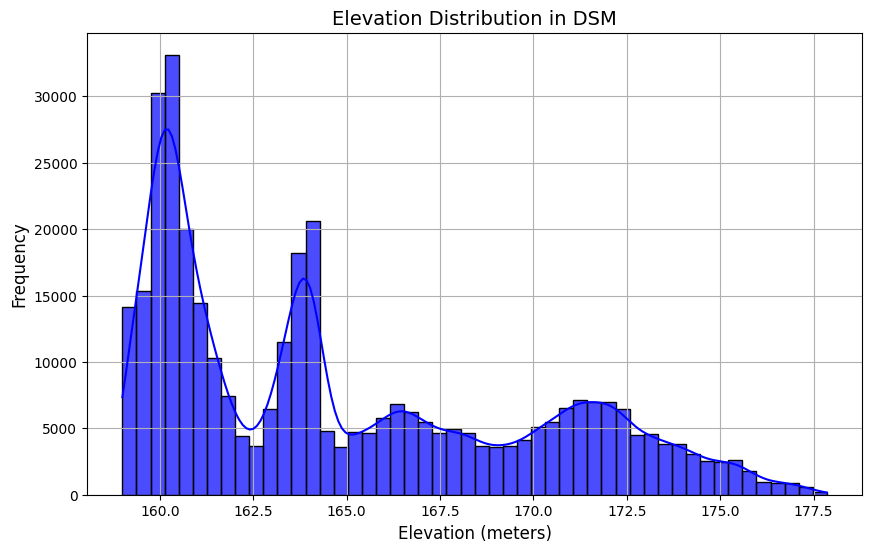

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_dsm(dsm_path):
    """
    Loads a DSM file and plots the distribution of elevation values.
    """
    # 🔹 Step 1: Load DSM
    with rasterio.open(dsm_path) as dataset:
        dsm = dataset.read(1).astype(np.float32)  # Read as float32
        dsm = np.nan_to_num(dsm, nan=np.nanmean(dsm))  # Replace NaNs with mean
    
    # 🔹 Step 2: Get Statistics
    min_val, max_val = np.min(dsm), np.max(dsm)
    mean_val, std_val = np.mean(dsm), np.std(dsm)
    
    print(f"📊 DSM Elevation Statistics:")
    print(f"   - Min Elevation: {min_val:.2f}")
    print(f"   - Max Elevation: {max_val:.2f}")
    print(f"   - Mean Elevation: {mean_val:.2f}")
    print(f"   - Std Dev: {std_val:.2f}")

    # 🔹 Step 3: Plot Histogram of Elevation Values
    plt.figure(figsize=(10, 6))
    sns.histplot(dsm.ravel(), bins=50, kde=True, color="blue", alpha=0.7)
    
    plt.title("Elevation Distribution in DSM", fontsize=14)
    plt.xlabel("Elevation (meters)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True)
    plt.show()

# 🔹 Run Analysis on DSM File
dsm_path = "32.884040299999995_-96.64130139999999_nearmap_dsm.tif"  # Replace with your DSM file
analyze_dsm(dsm_path)


📊 DSM Elevation Statistics:
   - Min Elevation: 2.37
   - Max Elevation: 19.80
   - Mean Elevation: 5.57
   - Std Dev: 3.83


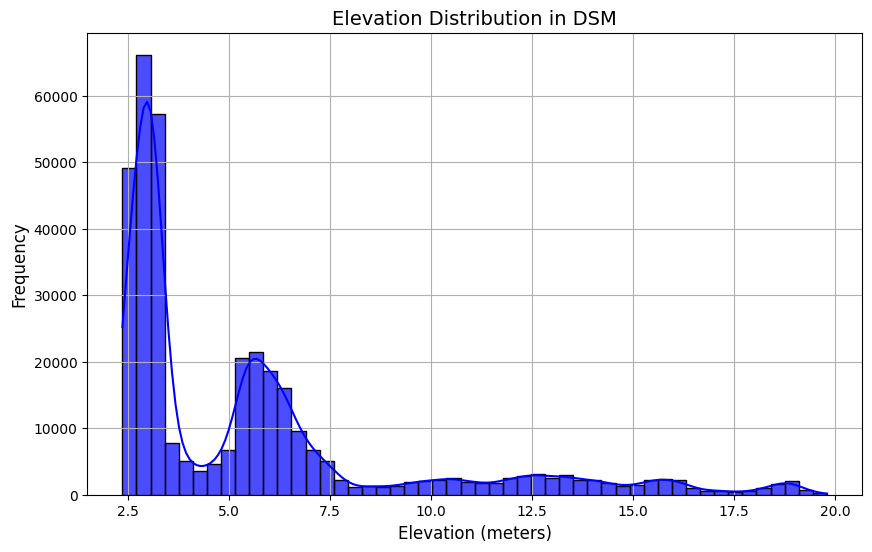

In [2]:

import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_dsm(dsm_path):
    """
    Loads a DSM file and plots the distribution of elevation values.
    """
    # 🔹 Step 1: Load DSM
    with rasterio.open(dsm_path) as dataset:
        dsm = dataset.read(1).astype(np.float32)  # Read as float32
        dsm = np.nan_to_num(dsm, nan=np.nanmean(dsm))  # Replace NaNs with mean
    
    # 🔹 Step 2: Get Statistics
    min_val, max_val = np.min(dsm), np.max(dsm)
    mean_val, std_val = np.mean(dsm), np.std(dsm)
    
    print(f"📊 DSM Elevation Statistics:")
    print(f"   - Min Elevation: {min_val:.2f}")
    print(f"   - Max Elevation: {max_val:.2f}")
    print(f"   - Mean Elevation: {mean_val:.2f}")
    print(f"   - Std Dev: {std_val:.2f}")

    # 🔹 Step 3: Plot Histogram of Elevation Values
    plt.figure(figsize=(10, 6))
    sns.histplot(dsm.ravel(), bins=50, kde=True, color="blue", alpha=0.7)
    
    plt.title("Elevation Distribution in DSM", fontsize=14)
    plt.xlabel("Elevation (meters)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True)
    plt.show()

# 🔹 Run Analysis on DSM File
dsm_path = "29.61274_-90.741292_sunroof_dsm.tif"  # Replace with your DSM file
analyze_dsm(dsm_path)


In [3]:
import numpy as np
import rasterio
import json
import cv2

# Load DSM TIFF
with rasterio.open("29.61274_-90.741292_sunroof_dsm.tif") as src:
    dsm = src.read(1)  # Read DSM as 2D array
    dsm_meta = src.meta  # Save metadata

# Load JSON mask
with open("29.61274_-90.741292_sunroof_rgb_outer.json", "r") as f:
    annotations = json.load(f)

# Create an empty mask (same size as DSM)
mask = np.zeros_like(dsm, dtype=np.uint8)

# Loop through annotations and keep only "roof" regions
for shape in annotations["shapes"]:
    if shape["label"].lower() == "roof":
        # Convert polygon points to numpy array
        polygon = np.array(shape["points"], np.int32)
        polygon = polygon.reshape((-1, 1, 2))  # Ensure OpenCV format
        # Draw filled polygon on mask
        cv2.fillPoly(mask, [polygon], 1)  # Mask = 1 for roof regions

# Apply mask: Keep only "roof" regions, set others to 0
dsm_masked = dsm * mask  # Multiplying keeps only roof regions

# Save the masked DSM
dsm_meta.update({"dtype": "float32"})  # Ensure correct dtype
with rasterio.open("masked_dsm_google.tif", "w", **dsm_meta) as dst:
    dst.write(dsm_masked.astype(np.float32), 1)

print("✅ Mask applied! 'masked_dsm.tif' saved.")


✅ Mask applied! 'masked_dsm.tif' saved.


📊 DSM Elevation Statistics:
   - Min Elevation: 160.76
   - Max Elevation: 173.25
   - Mean Elevation: 164.06
   - Std Dev: 0.37


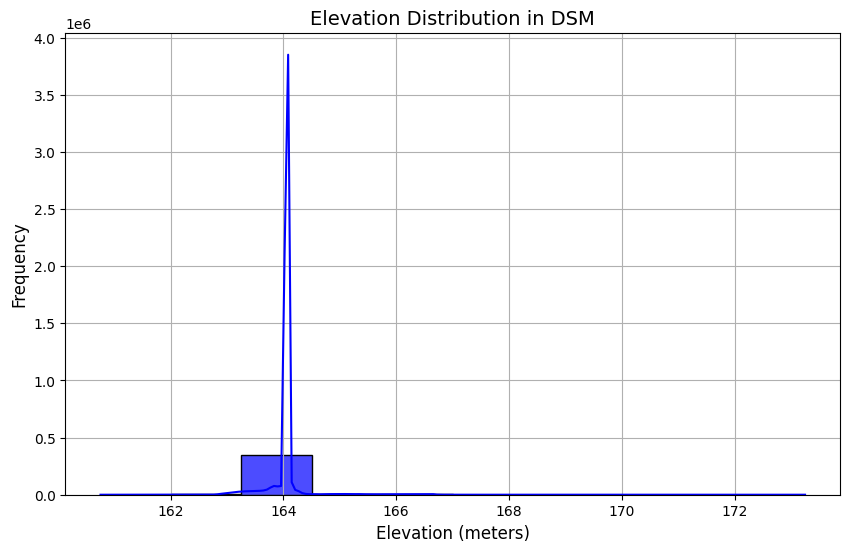

In [4]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_dsm(dsm_path):
    """
    Loads a DSM file and plots the distribution of elevation values.
    """
    # 🔹 Step 1: Load DSM
    with rasterio.open(dsm_path) as dataset:
        dsm = dataset.read(1).astype(np.float32)  # Read as float32
        dsm = np.nan_to_num(dsm, nan=np.nanmean(dsm))  # Replace NaNs with mean
    
    # 🔹 Step 2: Get Statistics
    min_val, max_val = np.min(dsm), np.max(dsm)
    mean_val, std_val = np.mean(dsm), np.std(dsm)
    
    print(f"📊 DSM Elevation Statistics:")
    print(f"   - Min Elevation: {min_val:.2f}")
    print(f"   - Max Elevation: {max_val:.2f}")
    print(f"   - Mean Elevation: {mean_val:.2f}")
    print(f"   - Std Dev: {std_val:.2f}")

    # 🔹 Step 3: Plot Histogram of Elevation Values
    plt.figure(figsize=(10, 6))
    sns.histplot(dsm.ravel(), bins=10, kde=True, color="blue", alpha=0.7)
    
    plt.title("Elevation Distribution in DSM", fontsize=14)
    plt.xlabel("Elevation (meters)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True)
    plt.show()

# 🔹 Run Analysis on DSM File
dsm_path = "masked_dsm.tif"  # Replace with your DSM file
analyze_dsm(dsm_path)


📊 DSM Elevation Statistics:
   - Min Elevation: 0.00
   - Max Elevation: 7.82
   - Mean Elevation: 1.17
   - Std Dev: 2.45


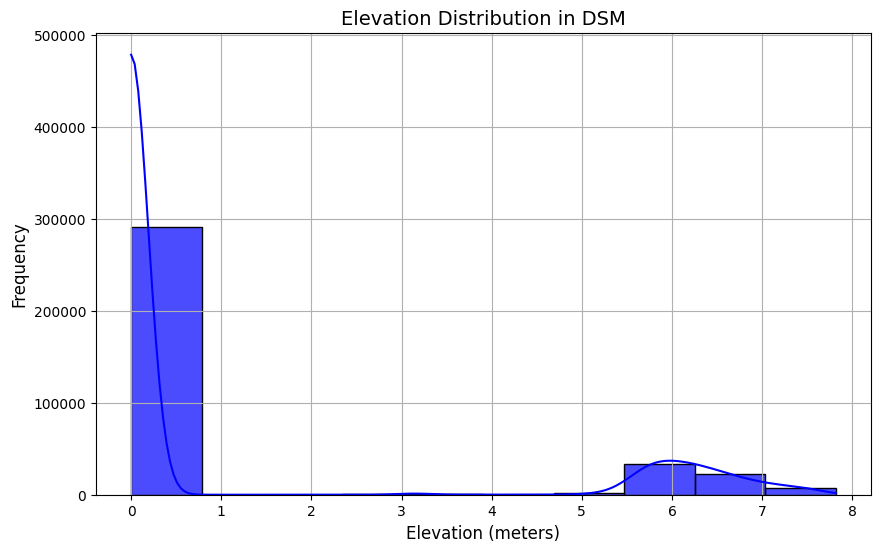

In [5]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_dsm(dsm_path):
    """
    Loads a DSM file and plots the distribution of elevation values.
    """
    # 🔹 Step 1: Load DSM
    with rasterio.open(dsm_path) as dataset:
        dsm = dataset.read(1).astype(np.float32)  # Read as float32
        dsm = np.nan_to_num(dsm, nan=np.nanmean(dsm))  # Replace NaNs with mean
    
    # 🔹 Step 2: Get Statistics
    min_val, max_val = np.min(dsm), np.max(dsm)
    mean_val, std_val = np.mean(dsm), np.std(dsm)
    
    print(f"📊 DSM Elevation Statistics:")
    print(f"   - Min Elevation: {min_val:.2f}")
    print(f"   - Max Elevation: {max_val:.2f}")
    print(f"   - Mean Elevation: {mean_val:.2f}")
    print(f"   - Std Dev: {std_val:.2f}")

    # 🔹 Step 3: Plot Histogram of Elevation Values
    plt.figure(figsize=(10, 6))
    sns.histplot(dsm.ravel(), bins=10, kde=True, color="blue", alpha=0.7)
    
    plt.title("Elevation Distribution in DSM", fontsize=14)
    plt.xlabel("Elevation (meters)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True)
    plt.show()

# 🔹 Run Analysis on DSM File
dsm_path = "masked_dsm_google.tif"  # Replace with your DSM file
analyze_dsm(dsm_path)


📊 Top 5% Elevation Threshold: 164.06 meters


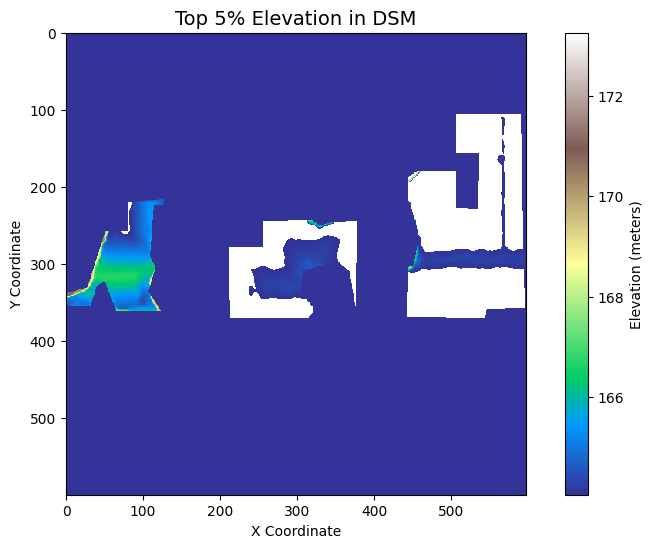

In [4]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
def visualize_top_5_percent_dsm(dsm_path):
    """
    Loads a DSM and visualizes only the top 5% elevation values.
    """
    # 🔹 Step 1: Load DSM
    with rasterio.open(dsm_path) as dataset:
        dsm = dataset.read(1).astype(np.float32)  # Read DSM as float32
        dsm = np.nan_to_num(dsm, nan=np.nanmean(dsm))  # Replace NaNs with mean

    # 🔹 Step 2: Calculate the 95th Percentile Elevation
    top_5_threshold = np.percentile(dsm, 90)  # Get top 10% elevation cutoff
    print(f"📊 Top 5% Elevation Threshold: {top_5_threshold:.2f} meters")

    # 🔹 Step 3: Mask Lower Elevations (Keep Only Top 5%)
    top_5_mask = np.where(dsm >= top_5_threshold, dsm, np.nan)  # Set lower values to NaN

    # 🔹 Step 4: Visualize the Filtered DSM
    plt.figure(figsize=(10, 6))
    plt.imshow(top_5_mask, cmap="terrain", interpolation="nearest")
    plt.colorbar(label="Elevation (meters)")
    plt.title("Top 5% Elevation in DSM", fontsize=14)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(False)
    plt.show()

# 🔹 Run Visualization on DSM File
dsm_path = "masked_dsm.tif"  # Replace with your DSM file path
visualize_top_5_percent_dsm(dsm_path)

📊 Top 5% Elevation Threshold: 6.59 meters


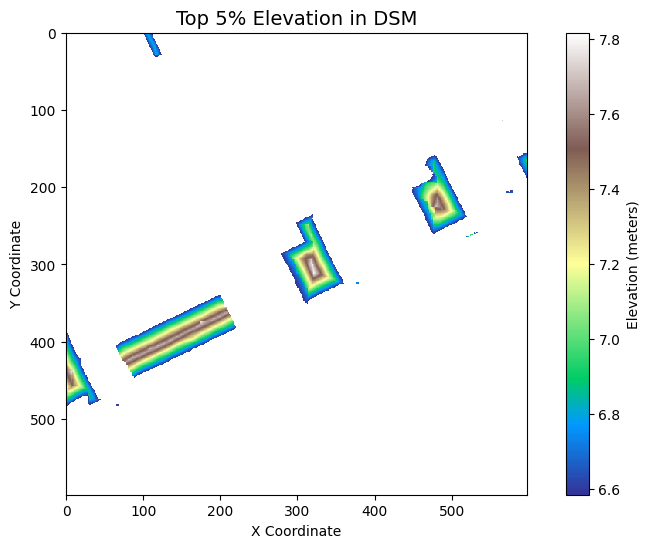

In [7]:
def visualize_top_5_percent_dsm(dsm_path):
    """
    Loads a DSM and visualizes only the top 5% elevation values.
    """
    # 🔹 Step 1: Load DSM
    with rasterio.open(dsm_path) as dataset:
        dsm = dataset.read(1).astype(np.float32)  # Read DSM as float32
        dsm = np.nan_to_num(dsm, nan=np.nanmean(dsm))  # Replace NaNs with mean

    # 🔹 Step 2: Calculate the 95th Percentile Elevation
    top_5_threshold = np.percentile(dsm, 95)  # Get top 5% elevation cutoff
    print(f"📊 Top 5% Elevation Threshold: {top_5_threshold:.2f} meters")

    # 🔹 Step 3: Mask Lower Elevations (Keep Only Top 5%)
    top_5_mask = np.where(dsm >= top_5_threshold, dsm, np.nan)  # Set lower values to NaN

    # 🔹 Step 4: Visualize the Filtered DSM
    plt.figure(figsize=(10, 6))
    plt.imshow(top_5_mask, cmap="terrain", interpolation="nearest")
    plt.colorbar(label="Elevation (meters)")
    plt.title("Top 5% Elevation in DSM", fontsize=14)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(False)
    plt.show()

# 🔹 Run Visualization on DSM File
dsm_path = "masked_dsm_google.tif"  # Replace with your DSM file path
visualize_top_5_percent_dsm(dsm_path)

In [8]:
import numpy as np
import rasterio  # For reading DSM files
from sklearn.decomposition import PCA
from sklearn.feature_extraction.image import extract_patches_2d

def apply_pca_with_patches(dsm, patch_size=(3,3), n_components=3):
    h, w = dsm.shape
    
    # Extract overlapping patches from DSM
    patches = extract_patches_2d(dsm, patch_size)
    print("Extracted patches shape:", patches.shape)  # Debugging output
    
    # Flatten each patch into a feature vector (patch_size[0] * patch_size[1] features per patch)
    patches = patches.reshape(patches.shape[0], -1)
    print("Flattened patches shape:", patches.shape)  # Debugging output
    
    # Ensure there are enough features for PCA
    n_samples, n_features = patches.shape
    if n_features < n_components:
        raise ValueError(f"Cannot apply PCA with {n_components} components, only {n_features} features available.")
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    transformed_patches = pca.fit_transform(patches)
    
    return transformed_patches, pca.explained_variance_ratio_

# Load DSM file
def load_dsm(file_path):
    with rasterio.open(file_path) as src:
        dsm = src.read(1)  # Read first band (grayscale DSM)
    return dsm

# Example usage
file_path = "32.884040299999995_-96.64130139999999_nearmap_dsm.tif"  # Replace with actual file path
dsm = load_dsm(file_path)

# Apply PCA
try:
    transformed_patches, explained_variance = apply_pca_with_patches(dsm, patch_size=(3,3), n_components=3)
    print("PCA applied successfully!")
    print("Explained Variance Ratio:", explained_variance)
except ValueError as e:
    print("Error:", e)


Extracted patches shape: (356408, 3, 3)
Flattened patches shape: (356408, 9)
PCA applied successfully!
Explained Variance Ratio: [0.99426398 0.00283128 0.00237842]


Explained Variance Ratio: [0.99426398 0.00283128 0.00237842]
Reconstruction Error (MSE): 0.013654421083629131


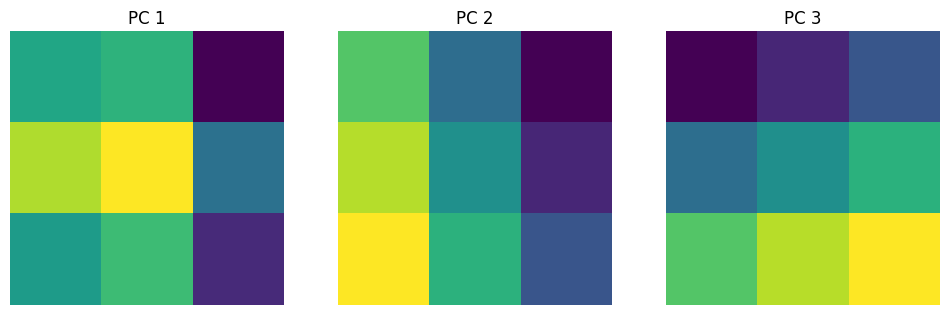

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.image import extract_patches_2d
import rasterio  # For reading DSM files

def apply_pca_with_patches(dsm, patch_size=(3,3), n_components=3):
    h, w = dsm.shape
    
    # Extract patches and flatten into feature vectors
    patches = extract_patches_2d(dsm, patch_size)
    patches = patches.reshape(patches.shape[0], -1)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    transformed_patches = pca.fit_transform(patches)
    
    # Reconstruct the patches using inverse PCA
    reconstructed_patches = pca.inverse_transform(transformed_patches)
    
    # Compute MSE between original and reconstructed patches
    mse = mean_squared_error(patches, reconstructed_patches)
    
    return transformed_patches, pca.explained_variance_ratio_, mse, pca

# Load DSM file
def load_dsm(file_path):
    with rasterio.open(file_path) as src:
        dsm = src.read(1)  # Read first band (grayscale DSM)
    return dsm

# Example usage
file_path = "32.884040299999995_-96.64130139999999_nearmap_dsm.tif"  # Replace with actual file path
dsm = load_dsm(file_path)

# Apply PCA and evaluate
transformed_patches, explained_variance, mse, pca = apply_pca_with_patches(dsm, patch_size=(3,3), n_components=3)

# Print evaluation results
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Reconstruction Error (MSE): {mse}")

# Plot the first 3 principal components
plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(pca.components_[i].reshape(3, 3), cmap="viridis")  # Reshape for visualization
    plt.title(f"PC {i+1}")
    plt.axis("off")
plt.show()


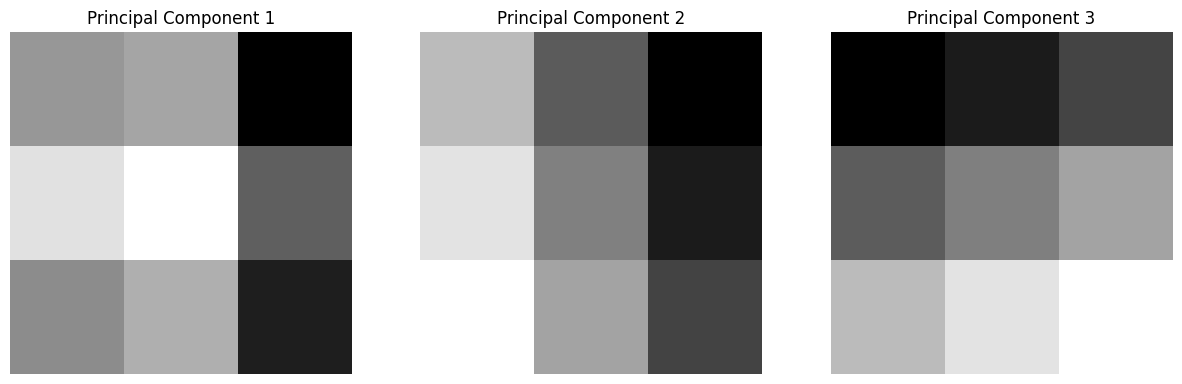

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from sklearn.decomposition import PCA
from sklearn.feature_extraction.image import extract_patches_2d

def apply_pca_and_reconstruct(dsm, patch_size=(3,3), n_components=3):
    h, w = dsm.shape
    
    # Extract overlapping patches and flatten
    patches = extract_patches_2d(dsm, patch_size)
    patches = patches.reshape(patches.shape[0], -1)

    # Apply PCA
    pca = PCA(n_components=n_components)
    transformed_patches = pca.fit_transform(patches)

    # Reconstruct DSM from PCA components
    reconstructed_patches = pca.inverse_transform(transformed_patches)
    
    return pca, transformed_patches, reconstructed_patches

# Load DSM file
def load_dsm(file_path):
    with rasterio.open(file_path) as src:
        dsm = src.read(1)  # Read first band (grayscale DSM)
    return dsm

# Example usage
file_path = "32.884040299999995_-96.64130139999999_nearmap_dsm.tif"  # Replace with actual file path
dsm = load_dsm(file_path)

# Apply PCA
pca, transformed_patches, reconstructed_patches = apply_pca_and_reconstruct(dsm, patch_size=(3,3), n_components=3)

# Visualize principal components as heatmaps
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    pc_image = pca.components_[i].reshape(3, 3)  # Reshape PC for visualization
    axes[i].imshow(pc_image, cmap="gray")
    axes[i].set_title(f"Principal Component {i+1}")
    axes[i].axis("off")

plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler
import cv2

# Flatten image
rgb_img = cv2.imread("32.884040299999995_-96.64130139999999_nearmap_rgb.tif") 
flattened_img = rgb_img.reshape(-1, 3)

# Standardize
scaler = StandardScaler()
normalized_img = scaler.fit_transform(flattened_img)

# Apply PCA
pca = PCA(n_components=2)  # Reduce dimensions
pca_transformed = pca.fit_transform(normalized_img)

# Print Variance Ratios
print("Explained Variance Ratios:", pca.explained_variance_ratio_)


Explained Variance Ratios: [0.98793972 0.0081408 ]


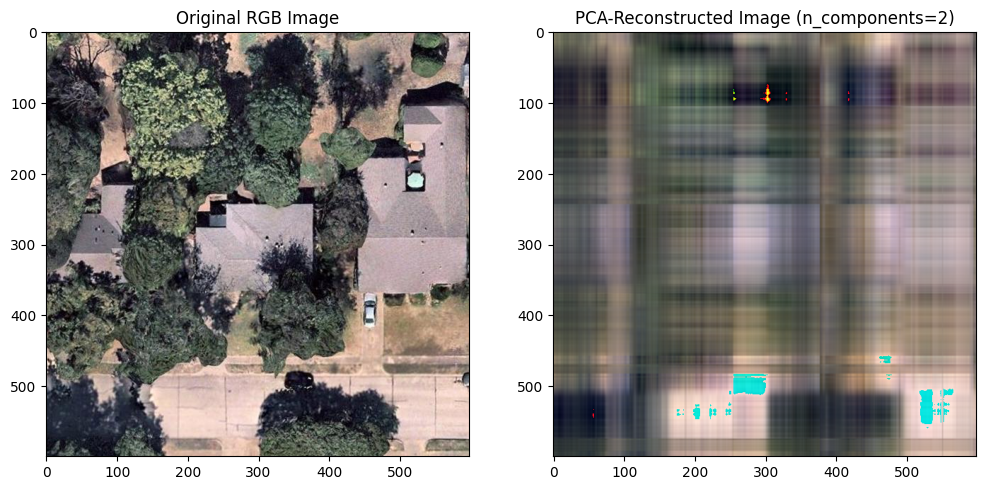

Red Channel Variance: [0.21123562 0.14960427]
Green Channel Variance: [0.18812805 0.14585814]
Blue Channel Variance: [0.196358   0.13435074]


In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load Image
rgb_img = cv2.imread("32.884040299999995_-96.64130139999999_nearmap_rgb.tif")
rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Split into R, G, B channels
r, g, b = cv2.split(rgb_img)

# Function to apply PCA and reconstruct
def apply_pca_reconstruct(channel, n_components=2):
    h, w = channel.shape
    flat_channel = channel.reshape(h, w)  # Keep 2D structure
    scaler = StandardScaler()
    flat_channel = scaler.fit_transform(flat_channel)  # Normalize

    pca = PCA(n_components=n_components)
    transformed = pca.fit_transform(flat_channel)  # Reduce dimensions
    reconstructed = pca.inverse_transform(transformed)  # Reconstruct

    return scaler.inverse_transform(reconstructed).reshape(h, w), pca.explained_variance_ratio_

# Apply PCA & Reconstruction to Each Channel
r_pca, r_var = apply_pca_reconstruct(r)
g_pca, g_var = apply_pca_reconstruct(g)
b_pca, b_var = apply_pca_reconstruct(b)

# Merge Reconstructed Channels
pca_rgb = cv2.merge([r_pca, g_pca, b_pca]).astype(np.uint8)

# Plot Original vs PCA-Reconstructed Image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(rgb_img)
ax[0].set_title("Original RGB Image")

ax[1].imshow(pca_rgb)
ax[1].set_title(f"PCA-Reconstructed Image (n_components=2)")

plt.show()

# Print Explained Variance
print(f"Red Channel Variance: {r_var}")
print(f"Green Channel Variance: {g_var}")
print(f"Blue Channel Variance: {b_var}")


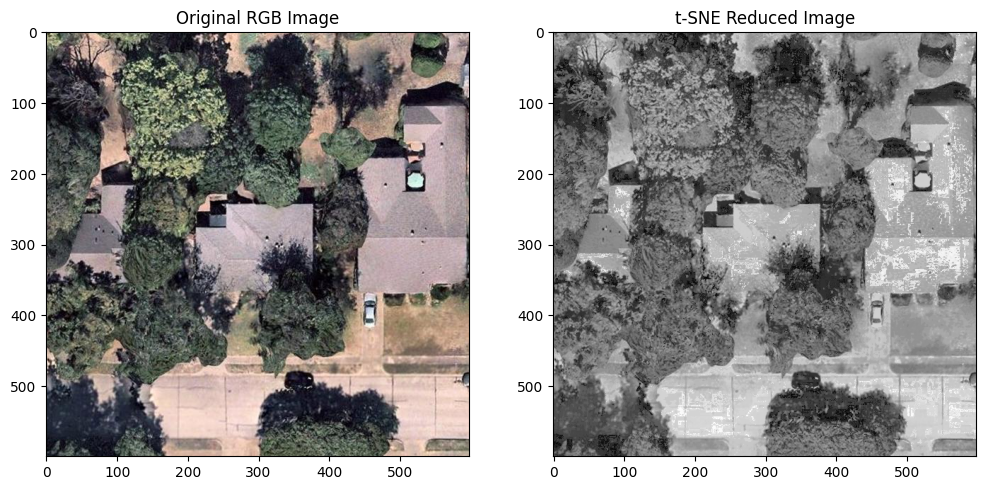

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

# Load Image
rgb_img = cv2.imread("32.884040299999995_-96.64130139999999_nearmap_rgb.tif")
rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Get Image Shape
h, w, c = rgb_img.shape

# Flatten Image (Each pixel as a 3D RGB point)
flat_pixels = rgb_img.reshape(-1, 3)

# Apply t-SNE (Reduce RGB to 1D)
tsne = TSNE(n_components=1, random_state=42, perplexity=30)
tsne_transformed = tsne.fit_transform(flat_pixels)  # Shape (h*w, 1)

# Normalize t-SNE Output to 0-255
scaler = MinMaxScaler(feature_range=(0, 255))
tsne_scaled = scaler.fit_transform(tsne_transformed).astype(np.uint8)

# Reshape Back to 2D
tsne_image = tsne_scaled.reshape(h, w)

# Plot Original vs t-SNE-Transformed Image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(rgb_img)
ax[0].set_title("Original RGB Image")

ax[1].imshow(tsne_image, cmap="gray")  # Since t-SNE reduces to 1D, it's grayscale
ax[1].set_title("t-SNE Reduced Image")

plt.show()


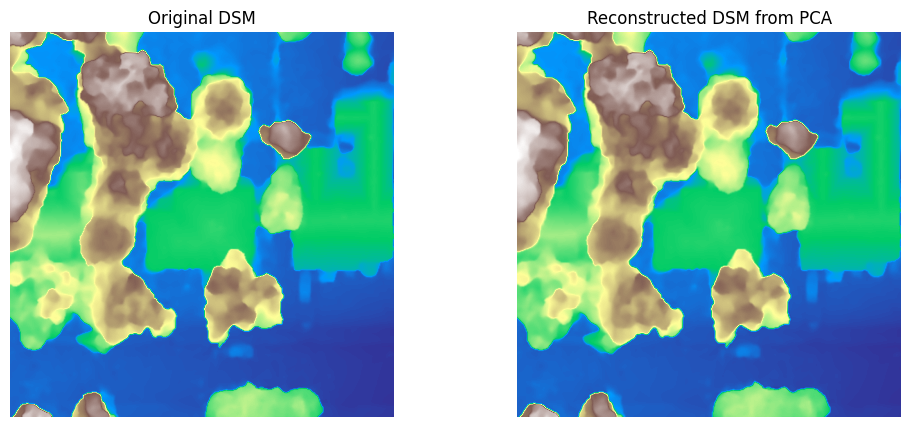

Explained Variance Ratios: [0.99426429 0.00283128 0.00237842]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from sklearn.decomposition import PCA
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d

# Load DSM file
def load_dsm(file_path):
    with rasterio.open(file_path) as src:
        dsm = src.read(1).astype(np.float32)  # Read first band (grayscale DSM)
    return dsm

# Apply PCA to spatial patches and reconstruct DSM
def apply_pca_and_reconstruct(dsm, patch_size=(3,3), n_components=3):
    h, w = dsm.shape

    # Extract overlapping patches
    patches = extract_patches_2d(dsm, patch_size)
    patches = patches.reshape(patches.shape[0], -1)  # Flatten each patch

    # Apply PCA
    pca = PCA(n_components=n_components)
    transformed_patches = pca.fit_transform(patches)

    # Reconstruct patches using inverse PCA
    reconstructed_patches = pca.inverse_transform(transformed_patches)

    # 🚀 FIX: Reshape back to (num_patches, patch_size[0], patch_size[1])
    reconstructed_patches = reconstructed_patches.reshape(-1, patch_size[0], patch_size[1])

    # Reconstruct DSM from patches
    reconstructed_dsm = reconstruct_from_patches_2d(reconstructed_patches, (h, w))

    return pca, reconstructed_dsm

# Example usage
file_path = "32.884040299999995_-96.64130139999999_nearmap_dsm.tif"  # Replace with actual file path
dsm = load_dsm(file_path)

# Apply PCA and reconstruct DSM
pca, reconstructed_dsm = apply_pca_and_reconstruct(dsm, patch_size=(3,3), n_components=3)

# Visualize Original vs. PCA-Reconstructed DSM
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(dsm, cmap="terrain")
axes[0].set_title("Original DSM")
axes[0].axis("off")

axes[1].imshow(reconstructed_dsm, cmap="terrain")
axes[1].set_title("Reconstructed DSM from PCA")
axes[1].axis("off")

plt.show()

# Print explained variance ratio
print("Explained Variance Ratios:", pca.explained_variance_ratio_)


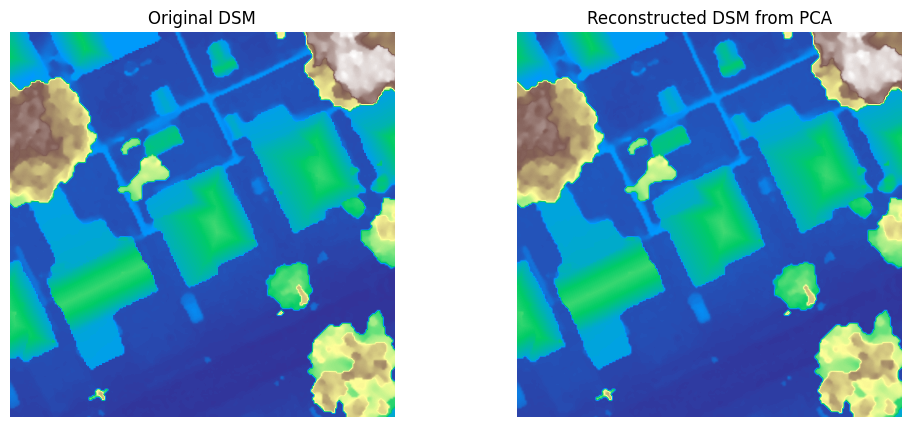

Explained Variance Ratios: [0.99434799 0.00268133 0.00232889]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from sklearn.decomposition import PCA
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d

# Load DSM file
def load_dsm(file_path):
    with rasterio.open(file_path) as src:
        dsm = src.read(1).astype(np.float32)  # Read first band (grayscale DSM)
    return dsm

# Apply PCA to spatial patches and reconstruct DSM
def apply_pca_and_reconstruct(dsm, patch_size=(3,3), n_components=3):
    h, w = dsm.shape

    # Extract overlapping patches
    patches = extract_patches_2d(dsm, patch_size)
    patches = patches.reshape(patches.shape[0], -1)  # Flatten each patch

    # Apply PCA
    pca = PCA(n_components=n_components)
    transformed_patches = pca.fit_transform(patches)

    # Reconstruct patches using inverse PCA
    reconstructed_patches = pca.inverse_transform(transformed_patches)

    # 🚀 FIX: Reshape back to (num_patches, patch_size[0], patch_size[1])
    reconstructed_patches = reconstructed_patches.reshape(-1, patch_size[0], patch_size[1])

    # Reconstruct DSM from patches
    reconstructed_dsm = reconstruct_from_patches_2d(reconstructed_patches, (h, w))

    return pca, reconstructed_dsm

# Example usage
file_path = "29.61274_-90.741292_sunroof_dsm.tif"  # Replace with actual file path
dsm = load_dsm(file_path)

# Apply PCA and reconstruct DSM
pca, reconstructed_dsm = apply_pca_and_reconstruct(dsm, patch_size=(3,3), n_components=3)

# Visualize Original vs. PCA-Reconstructed DSM
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(dsm, cmap="terrain")
axes[0].set_title("Original DSM")
axes[0].axis("off")

axes[1].imshow(reconstructed_dsm, cmap="terrain")
axes[1].set_title("Reconstructed DSM from PCA")
axes[1].axis("off")

plt.show()

# Print explained variance ratio
print("Explained Variance Ratios:", pca.explained_variance_ratio_)


In [16]:
# import numpy as np
# import matplotlib.pyplot as plt
# import rasterio
# from sklearn.decomposition import PCA
# from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d

# # Load DSM file
# def load_dsm(file_path):
#     with rasterio.open(file_path) as src:
#         dsm = src.read(1).astype(np.float32)  # Read first band (grayscale DSM)
#     return dsm

# # Apply PCA to spatial patches and reconstruct DSM
# def apply_pca_and_reconstruct(dsm, patch_size=(3,3), n_components=3):
#     h, w = dsm.shape

#     # Extract overlapping patches
#     patches = extract_patches_2d(dsm, patch_size)
#     patches = patches.reshape(patches.shape[0], -1)  # Flatten each patch

#     # Apply PCA
#     pca = PCA(n_components=n_components)
#     transformed_patches = pca.fit_transform(patches)

#     # Reconstruct patches using inverse PCA
#     reconstructed_patches = pca.inverse_transform(transformed_patches)

#     # 🚀 FIX: Reshape back to (num_patches, patch_size[0], patch_size[1])
#     reconstructed_patches = reconstructed_patches.reshape(-1, patch_size[0], patch_size[1])

#     # Reconstruct DSM from patches
#     reconstructed_dsm = reconstruct_from_patches_2d(reconstructed_patches, (h, w))

#     return pca, reconstructed_dsm

# # Example usage
# file_path = "masked_dsm.tif"  # Replace with actual file path
# dsm = load_dsm(file_path)
# dsm = np.nan_to_num(dsm, nan=0)

# # Apply PCA and reconstruct DSM
# pca, reconstructed_dsm = apply_pca_and_reconstruct(dsm, patch_size=(3,3), n_components=3)

# # Visualize Original vs. PCA-Reconstructed DSM
# fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# axes[0].imshow(dsm, cmap="terrain")
# axes[0].set_title("Original DSM")
# axes[0].axis("off")

# axes[1].imshow(reconstructed_dsm, cmap="terrain")
# axes[1].set_title("Reconstructed DSM from PCA")
# axes[1].axis("off")

# plt.show()

# # Print explained variance ratio
# print("Explained Variance Ratios:", pca.explained_variance_ratio_)


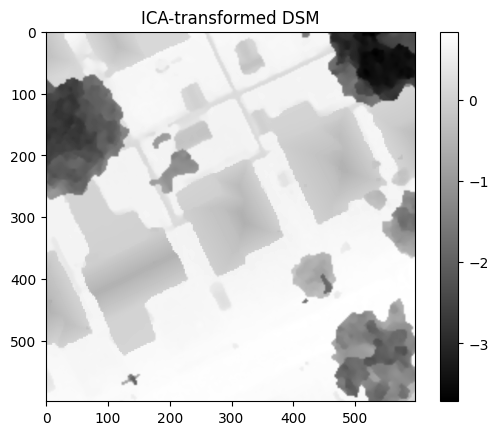

In [17]:
from sklearn.decomposition import FastICA
import numpy as np

# Ensure NaNs are replaced
dsm = np.nan_to_num(dsm, nan=0)

# Flatten DSM for ICA
h, w = dsm.shape  # Get height and width
dsm_flat = dsm.reshape(-1, 1)  # Convert to 2D array (pixels x 1 feature)

# Apply ICA
ica = FastICA(n_components=1, random_state=42)  # Extract 1 component
dsm_ica = ica.fit_transform(dsm_flat)

# Reshape back to original image dimensions
dsm_ica = dsm_ica.reshape(h, w)

# Display result
plt.imshow(dsm_ica, cmap="gray")
plt.title("ICA-transformed DSM")
plt.colorbar()
plt.show()


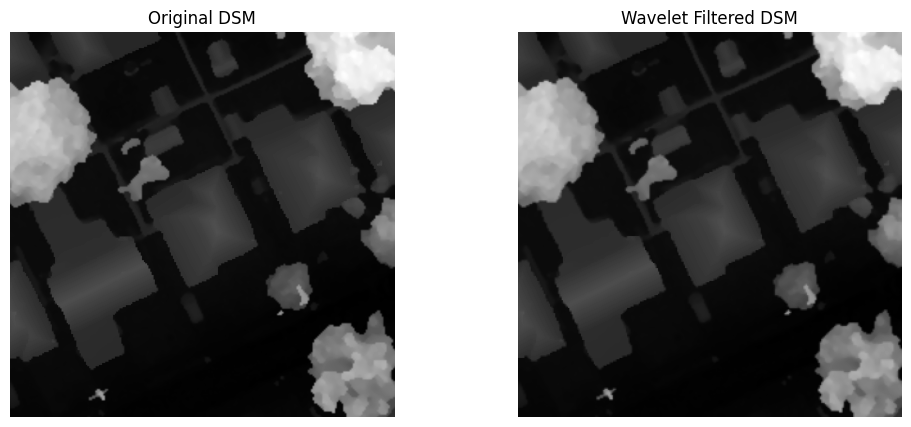

In [18]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Ensure NaNs are replaced
dsm = np.nan_to_num(dsm, nan=0)

# Apply 2D Discrete Wavelet Transform (DWT)
coeffs2 = pywt.dwt2(dsm, 'haar')  # Haar wavelet decomposition
LL, (LH, HL, HH) = coeffs2  # Extract sub-bands

# Reconstruct DSM using only LL (low-frequency components)
dsm_wavelet = pywt.idwt2((LL, (None, None, None)), 'haar')

# Plot Original vs Transformed DSM
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(dsm, cmap='gray')
ax[0].set_title("Original DSM")
ax[0].axis("off")

ax[1].imshow(dsm_wavelet, cmap='gray')
ax[1].set_title("Wavelet Filtered DSM")
ax[1].axis("off")

plt.show()


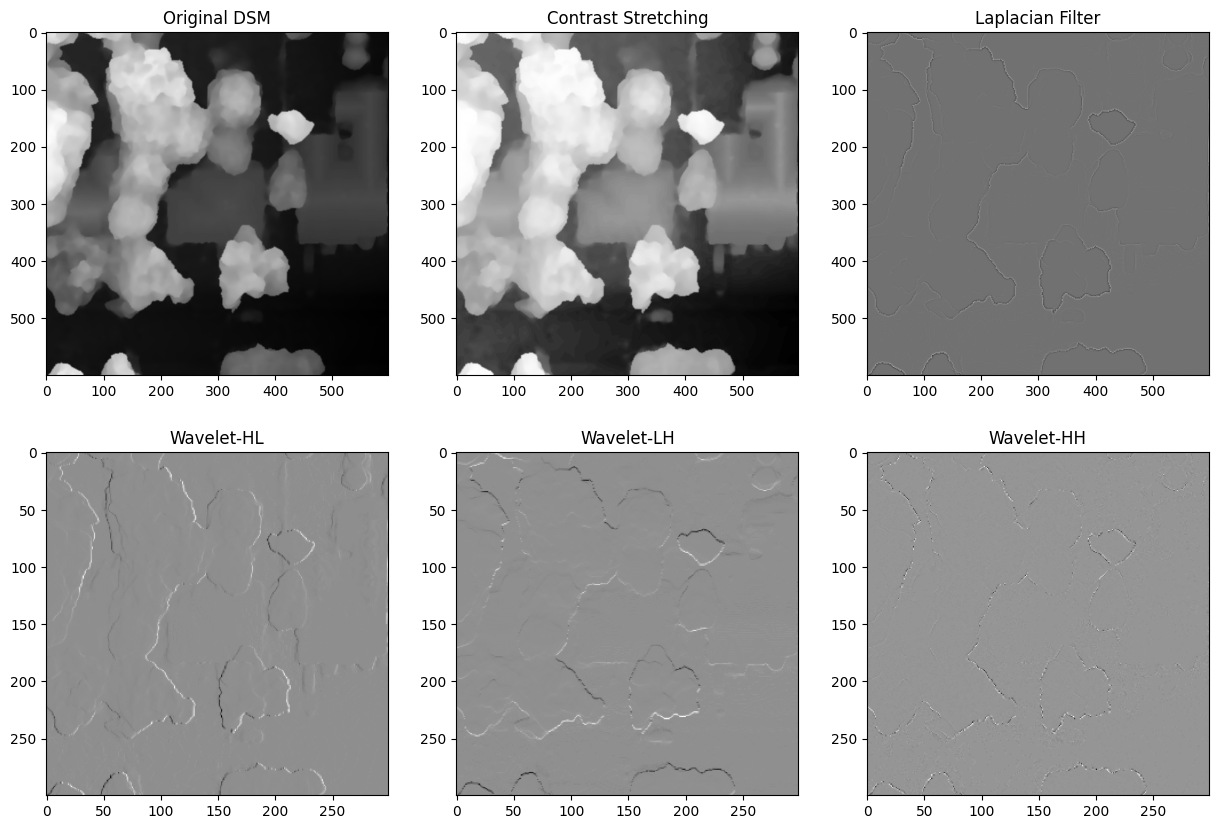

Gradient Enhancement Metrics (Higher = Better):
Original: Gradient Mag = 2.7473, Edge Count = 349641, Gradient Std = 7.8502
Contrast Stretch: Gradient Mag = 0.0119, Edge Count = 16454, Gradient Std = 0.0328
Laplacian: Gradient Mag = 2.7687, Edge Count = 291915, Gradient Std = 7.1634
Wavelet-HL: Gradient Mag = 1.7189, Edge Count = 71189, Gradient Std = 4.3797
Wavelet-LH: Gradient Mag = 1.5793, Edge Count = 72574, Gradient Std = 4.1850
Wavelet-HH: Gradient Mag = 0.5341, Edge Count = 65873, Gradient Std = 1.1170


In [19]:
import numpy as np
import rasterio
import cv2
import pywt
import matplotlib.pyplot as plt
from skimage.filters import sobel

# Load DSM from TIFF
with rasterio.open("32.884040299999995_-96.64130139999999_nearmap_dsm.tif") as src:
    dsm = src.read(1)  # Read the first band

# Step 1: Preprocessing
dsm = np.nan_to_num(dsm, nan=0)  # Replace NaNs with 0
dsm_norm = cv2.normalize(dsm, None, 0, 255, cv2.NORM_MINMAX)  # Normalize

# ---------------------- Contrast Stretching ----------------------
dsm_eq = cv2.equalizeHist(dsm_norm.astype(np.uint8))

# ---------------------- Laplacian Filtering ----------------------
laplacian = cv2.Laplacian(dsm_eq, cv2.CV_64F)

# ---------------------- Wavelet Transform ----------------------
coeffs2 = pywt.dwt2(dsm_eq, 'haar')  # Haar Wavelet
LL, (LH, HL, HH) = coeffs2

# ---------------------- Gradient Evaluation ----------------------
def compute_gradient_metrics(image):
    sobel_edges = sobel(image)
    gradient_magnitude = np.mean(np.abs(sobel_edges))  
    edge_count = np.sum(sobel_edges > 0.05)  
    gradient_std = np.std(sobel_edges)  
    return gradient_magnitude, edge_count, gradient_std

# Compute Metrics for Each
metrics = {
    "Original": compute_gradient_metrics(dsm_norm),
    "Contrast Stretch": compute_gradient_metrics(dsm_eq),
    "Laplacian": compute_gradient_metrics(laplacian),
    "Wavelet-HL": compute_gradient_metrics(HL),
    "Wavelet-LH": compute_gradient_metrics(LH),
    "Wavelet-HH": compute_gradient_metrics(HH)
}

# ---------------------- Plot Results ----------------------
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(dsm_norm, cmap="gray"), ax[0, 0].set_title("Original DSM")
ax[0, 1].imshow(dsm_eq, cmap="gray"), ax[0, 1].set_title("Contrast Stretching")
ax[0, 2].imshow(laplacian, cmap="gray"), ax[0, 2].set_title("Laplacian Filter")

ax[1, 0].imshow(HL, cmap="gray"), ax[1, 0].set_title("Wavelet-HL")
ax[1, 1].imshow(LH, cmap="gray"), ax[1, 1].set_title("Wavelet-LH")
ax[1, 2].imshow(HH, cmap="gray"), ax[1, 2].set_title("Wavelet-HH")

plt.show()

# Print Gradient Metrics for Comparison
print("Gradient Enhancement Metrics (Higher = Better):")
for key, (grad_mag, edge_count, grad_std) in metrics.items():
    print(f"{key}: Gradient Mag = {grad_mag:.4f}, Edge Count = {edge_count}, Gradient Std = {grad_std:.4f}")


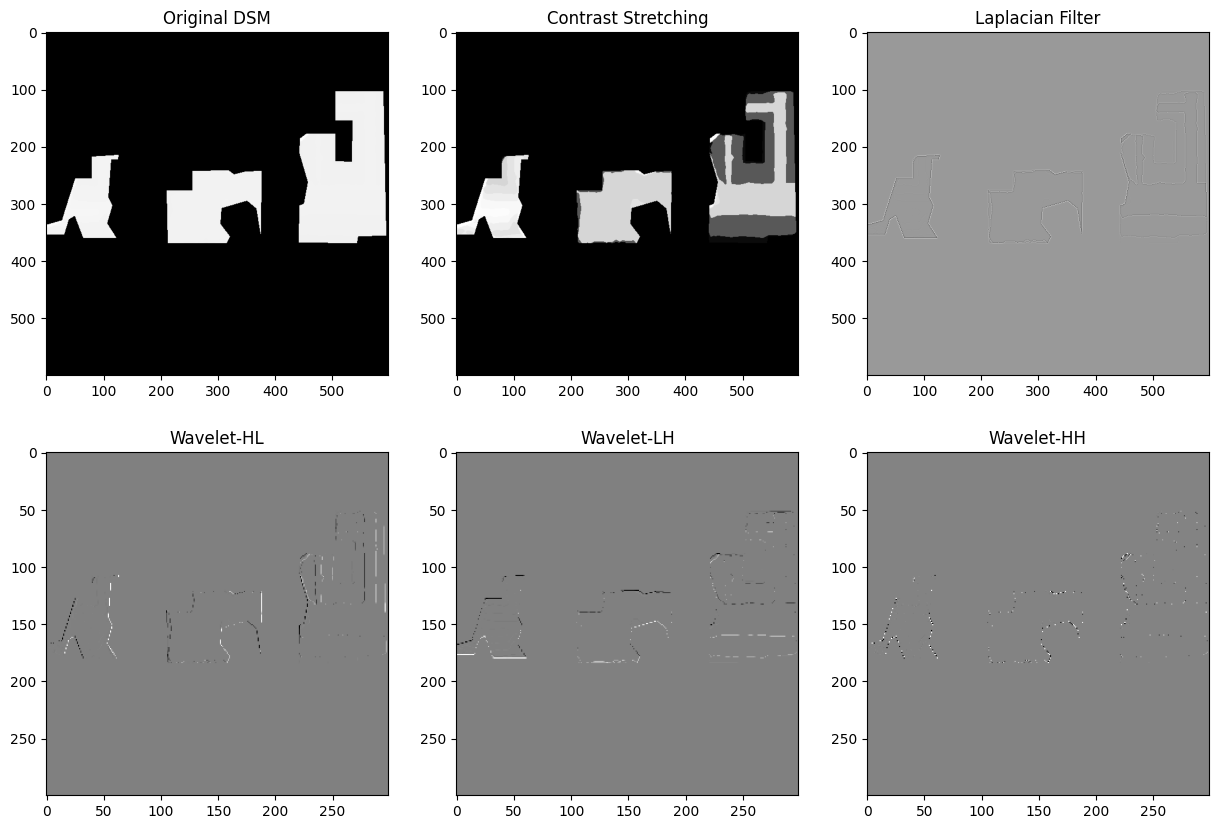

Gradient Enhancement Metrics (Higher = Better):
Original: Gradient Mag = 2.1416, Edge Count = 28534, Gradient Std = 18.6764
Contrast Stretch: Gradient Mag = 0.0082, Edge Count = 7855, Gradient Std = 0.0597
Laplacian: Gradient Mag = 4.0463, Edge Count = 18952, Gradient Std = 22.6256
Wavelet-HL: Gradient Mag = 1.6579, Edge Count = 3823, Gradient Std = 11.1626
Wavelet-LH: Gradient Mag = 1.4189, Edge Count = 3771, Gradient Std = 10.3942
Wavelet-HH: Gradient Mag = 0.5381, Edge Count = 2787, Gradient Std = 4.1392


In [20]:
import numpy as np
import rasterio
import cv2
import pywt
import matplotlib.pyplot as plt
from skimage.filters import sobel

# Load DSM from TIFF
with rasterio.open("masked_dsm.tif") as src:
    dsm = src.read(1)  # Read the first band

# Step 1: Preprocessing
dsm = np.nan_to_num(dsm, nan=0)  # Replace NaNs with 0
dsm_norm = cv2.normalize(dsm, None, 0, 255, cv2.NORM_MINMAX)  # Normalize

# ---------------------- Contrast Stretching ----------------------
dsm_eq = cv2.equalizeHist(dsm_norm.astype(np.uint8))

# ---------------------- Laplacian Filtering ----------------------
laplacian = cv2.Laplacian(dsm_eq, cv2.CV_64F)

# ---------------------- Wavelet Transform ----------------------
coeffs2 = pywt.dwt2(dsm_eq, 'haar')  # Haar Wavelet
LL, (LH, HL, HH) = coeffs2

# ---------------------- Gradient Evaluation ----------------------
def compute_gradient_metrics(image):
    sobel_edges = sobel(image)
    gradient_magnitude = np.mean(np.abs(sobel_edges))  
    edge_count = np.sum(sobel_edges > 0.05)  
    gradient_std = np.std(sobel_edges)  
    return gradient_magnitude, edge_count, gradient_std

# Compute Metrics for Each
metrics = {
    "Original": compute_gradient_metrics(dsm_norm),
    "Contrast Stretch": compute_gradient_metrics(dsm_eq),
    "Laplacian": compute_gradient_metrics(laplacian),
    "Wavelet-HL": compute_gradient_metrics(HL),
    "Wavelet-LH": compute_gradient_metrics(LH),
    "Wavelet-HH": compute_gradient_metrics(HH)
}

# ---------------------- Plot Results ----------------------
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(dsm_norm, cmap="gray"), ax[0, 0].set_title("Original DSM")
ax[0, 1].imshow(dsm_eq, cmap="gray"), ax[0, 1].set_title("Contrast Stretching")
ax[0, 2].imshow(laplacian, cmap="gray"), ax[0, 2].set_title("Laplacian Filter")

ax[1, 0].imshow(HL, cmap="gray"), ax[1, 0].set_title("Wavelet-HL")
ax[1, 1].imshow(LH, cmap="gray"), ax[1, 1].set_title("Wavelet-LH")
ax[1, 2].imshow(HH, cmap="gray"), ax[1, 2].set_title("Wavelet-HH")

plt.show()

# Print Gradient Metrics for Comparison
print("Gradient Enhancement Metrics (Higher = Better):")
for key, (grad_mag, edge_count, grad_std) in metrics.items():
    print(f"{key}: Gradient Mag = {grad_mag:.4f}, Edge Count = {edge_count}, Gradient Std = {grad_std:.4f}")


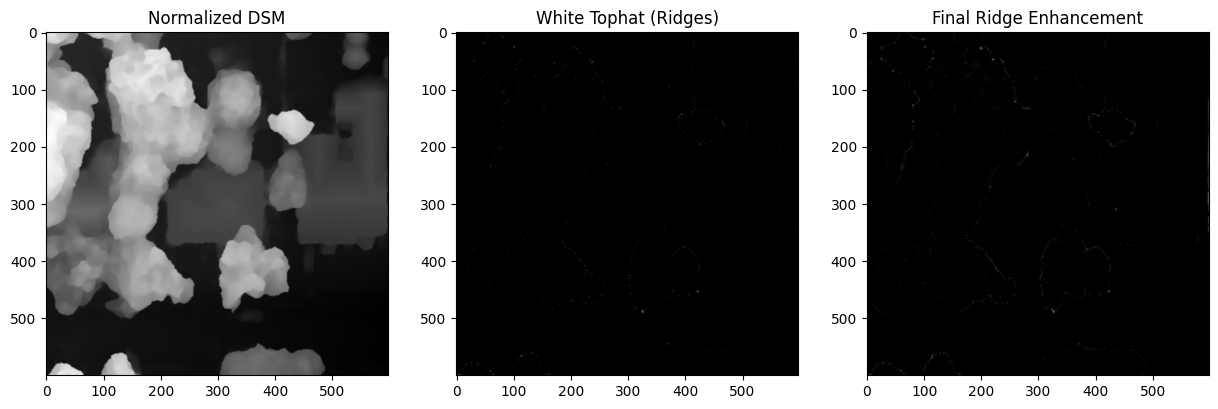

C:\Users\adity\AppData\Local\Temp\ipykernel_848\846546222.py:34: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  H_elems = hessian_matrix(dsm_norm, sigma=1, order='xy')


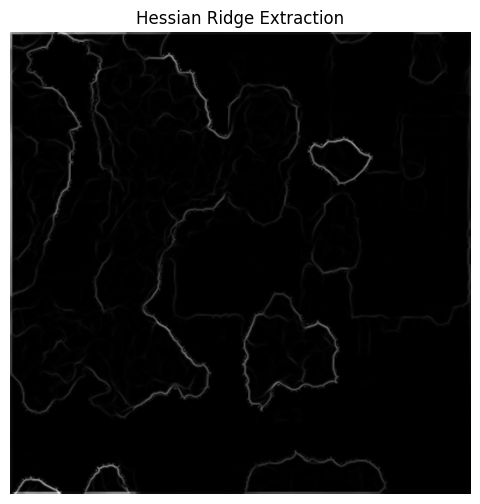

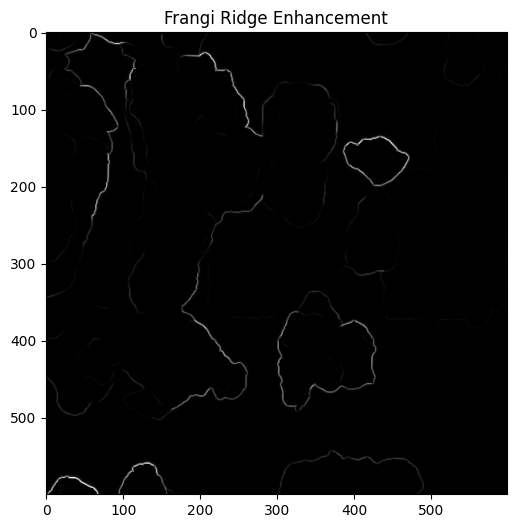

In [21]:
import numpy as np
import rasterio
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import white_tophat, black_tophat, disk

# Load DSM TIFF
with rasterio.open("32.884040299999995_-96.64130139999999_nearmap_dsm.tif") as src:
    dsm = src.read(1)  

# Replace NaNs with 0
dsm = np.nan_to_num(dsm)

# Normalize DSM to 0-255
dsm_norm = cv2.normalize(dsm, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Morphological Ridge Enhancement
selem = disk(3)  # Structuring element for filtering
ridge_tophat = white_tophat(dsm_norm, selem)
valley_tophat = black_tophat(dsm_norm, selem)

# Combine Both
ridge_enhanced = cv2.add(ridge_tophat, valley_tophat)

# Visualization
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(dsm_norm, cmap="gray"), ax[0].set_title("Normalized DSM")
ax[1].imshow(ridge_tophat, cmap="gray"), ax[1].set_title("White Tophat (Ridges)")
ax[2].imshow(ridge_enhanced, cmap="gray"), ax[2].set_title("Final Ridge Enhancement")
plt.show()
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

# Compute Hessian Matrix
H_elems = hessian_matrix(dsm_norm, sigma=1, order='xy')

# Compute Eigenvalues
eig1, eig2 = hessian_matrix_eigvals(H_elems)

# Use the second eigenvalue (stronger curvature response)
ridge_hessian = np.abs(eig2)  

# Normalize for visualization
ridge_hessian = (ridge_hessian - np.min(ridge_hessian)) / (np.max(ridge_hessian) - np.min(ridge_hessian))

# Plot Results
plt.figure(figsize=(6,6))
plt.imshow(ridge_hessian, cmap="gray")
plt.title("Hessian Ridge Extraction")
plt.axis("off")
plt.show()
from skimage.filters import frangi

ridge_frangi = frangi(dsm_norm, sigmas=[1, 3, 5])

plt.figure(figsize=(6,6))
plt.imshow(ridge_frangi, cmap="gray")
plt.title("Frangi Ridge Enhancement")
plt.show()




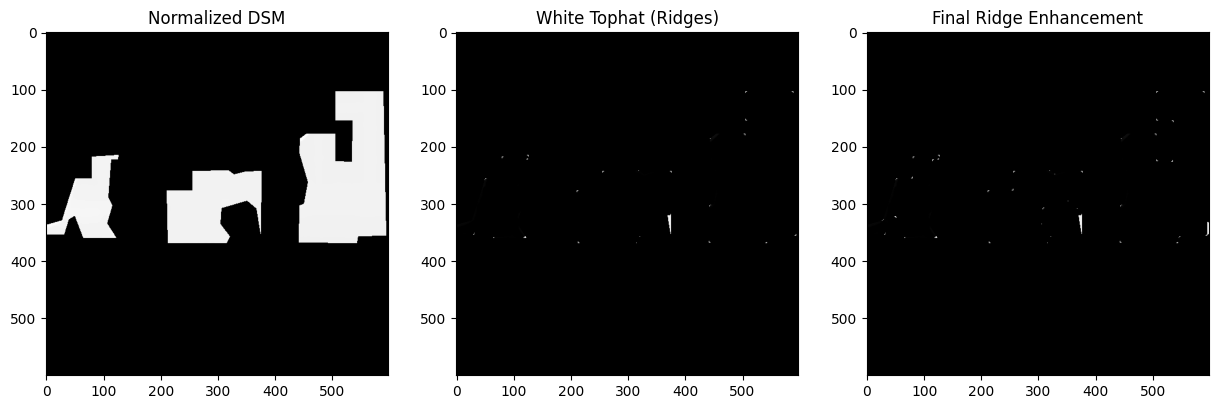

C:\Users\adity\AppData\Local\Temp\ipykernel_848\1042188567.py:32: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  H_elems = hessian_matrix(dsm_norm, sigma=1, order='xy')


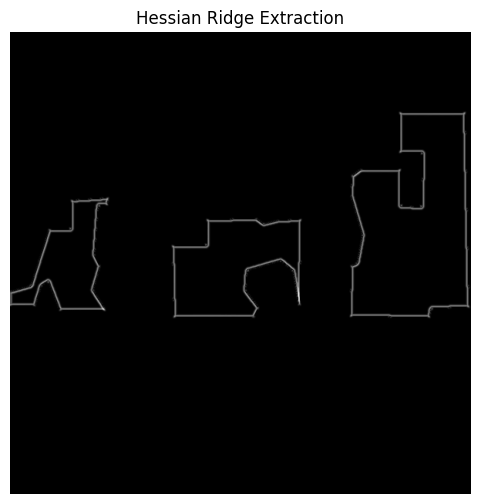

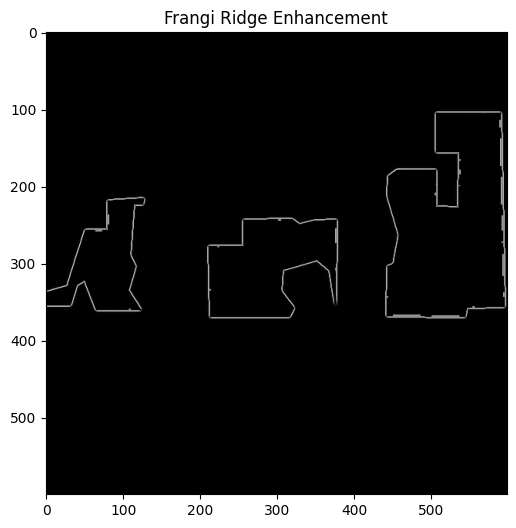

In [22]:
import numpy as np
import rasterio
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import white_tophat, black_tophat, disk

# Load DSM TIFF
with rasterio.open("masked_dsm.tif") as src:
    dsm = src.read(1)  

# Replace NaNs with 0
dsm = np.nan_to_num(dsm)

# Normalize DSM to 0-255
dsm_norm = cv2.normalize(dsm, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Morphological Ridge Enhancement
selem = disk(3)  # Structuring element for filtering
ridge_tophat = white_tophat(dsm_norm, selem)
valley_tophat = black_tophat(dsm_norm, selem)

# Combine Both
ridge_enhanced = cv2.add(ridge_tophat, valley_tophat)

# Visualization
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(dsm_norm, cmap="gray"), ax[0].set_title("Normalized DSM")
ax[1].imshow(ridge_tophat, cmap="gray"), ax[1].set_title("White Tophat (Ridges)")
ax[2].imshow(ridge_enhanced, cmap="gray"), ax[2].set_title("Final Ridge Enhancement")
plt.show()
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
H_elems = hessian_matrix(dsm_norm, sigma=1, order='xy')

# Compute Eigenvalues
eig1, eig2 = hessian_matrix_eigvals(H_elems)

# Use the second eigenvalue (stronger curvature response)
ridge_hessian = np.abs(eig2)  

# Normalize for visualization
ridge_hessian = (ridge_hessian - np.min(ridge_hessian)) / (np.max(ridge_hessian) - np.min(ridge_hessian))

# Plot Results
plt.figure(figsize=(6,6))
plt.imshow(ridge_hessian, cmap="gray")
plt.title("Hessian Ridge Extraction")
plt.axis("off")
plt.show()
from skimage.filters import frangi

ridge_frangi = frangi(dsm_norm, sigmas=[1, 3, 5])

plt.figure(figsize=(6,6))
plt.imshow(ridge_frangi, cmap="gray")
plt.title("Frangi Ridge Enhancement")
plt.show()




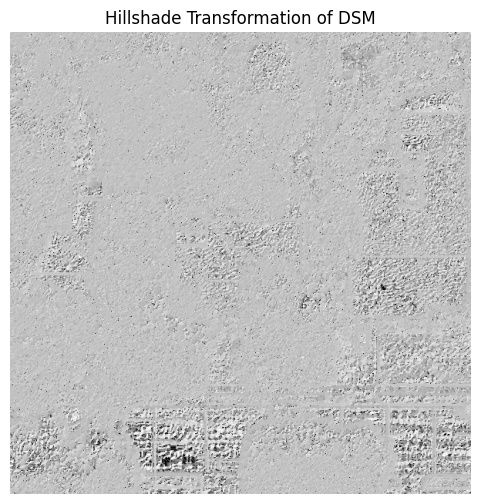

In [23]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

def hillshade(dsm, azimuth=315, elevation=45):
    """Compute a hillshade transformation on a DSM image."""
    # Convert angles to radians
    azimuth_rad = np.radians(azimuth)
    elevation_rad = np.radians(elevation)

    # Compute gradients in X and Y directions
    dx, dy = np.gradient(dsm)

    # Compute slope and aspect
    slope = np.arctan(np.sqrt(dx**2 + dy**2))
    aspect = np.arctan2(-dx, dy)

    # Compute the hillshade effect
    shaded = np.sin(elevation_rad) * np.sin(slope) + np.cos(elevation_rad) * np.cos(slope) * np.cos(azimuth_rad - aspect)

    # Normalize to 0-255 range
    hillshade_image = (shaded - np.min(shaded)) / (np.max(shaded) - np.min(shaded) + 1e-6) * 255
    return hillshade_image.astype(np.uint8)

# **Load DSM**
with rasterio.open("32.884040299999995_-96.64130139999999_nearmap_rgb.tif") as src:
    dsm = src.read(1)   # Using previously defined TIFF loading function

# **Apply Hillshade Transformation**
hillshade_dsm = hillshade(dsm)

# **Visualize**
plt.figure(figsize=(8, 6))
plt.imshow(hillshade_dsm, cmap='gray')
plt.title("Hillshade Transformation of DSM")
plt.axis('off')
plt.show()


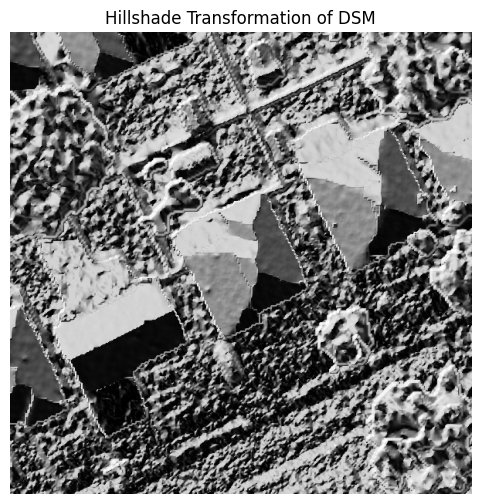

In [24]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

def hillshade(dsm, azimuth=315, elevation=45):
    """Compute a hillshade transformation on a DSM image."""
    # Convert angles to radians
    azimuth_rad = np.radians(azimuth)
    elevation_rad = np.radians(elevation)

    # Compute gradients in X and Y directions
    dx, dy = np.gradient(dsm)

    # Compute slope and aspect
    slope = np.arctan(np.sqrt(dx**2 + dy**2))
    aspect = np.arctan2(-dx, dy)

    # Compute the hillshade effect
    shaded = np.sin(elevation_rad) * np.sin(slope) + np.cos(elevation_rad) * np.cos(slope) * np.cos(azimuth_rad - aspect)

    # Normalize to 0-255 range
    hillshade_image = (shaded - np.min(shaded)) / (np.max(shaded) - np.min(shaded) + 1e-6) * 255
    return hillshade_image.astype(np.uint8)

# **Load DSM**
with rasterio.open("29.61274_-90.741292_sunroof_dsm.tif") as src:
    dsm = src.read(1)   # Using previously defined TIFF loading function

# **Apply Hillshade Transformation**
hillshade_dsm = hillshade(dsm)

# **Visualize**
plt.figure(figsize=(8, 6))
plt.imshow(hillshade_dsm, cmap='gray')
plt.title("Hillshade Transformation of DSM")
plt.axis('off')
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_848\3964850871.py:23: RuntimeWarning: invalid value encountered in cast
  return hillshade_image.astype(np.uint8)


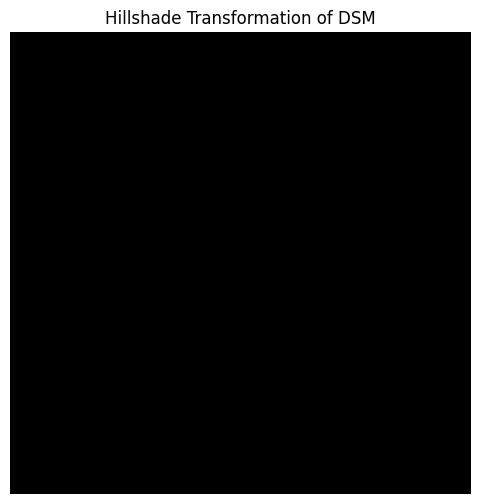

In [25]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

def hillshade(dsm, azimuth=315, elevation=45):
    """Compute a hillshade transformation on a DSM image."""
    # Convert angles to radians
    azimuth_rad = np.radians(azimuth)
    elevation_rad = np.radians(elevation)

    # Compute gradients in X and Y directions
    dx, dy = np.gradient(dsm)

    # Compute slope and aspect
    slope = np.arctan(np.sqrt(dx**2 + dy**2))
    aspect = np.arctan2(-dx, dy)

    # Compute the hillshade effect
    shaded = np.sin(elevation_rad) * np.sin(slope) + np.cos(elevation_rad) * np.cos(slope) * np.cos(azimuth_rad - aspect)

    # Normalize to 0-255 range
    hillshade_image = (shaded - np.min(shaded)) / (np.max(shaded) - np.min(shaded) + 1e-6) * 255
    return hillshade_image.astype(np.uint8)

# **Load DSM**
with rasterio.open("masked_dsm.tif") as src:
    dsm = src.read(1)   # Using previously defined TIFF loading function

# **Apply Hillshade Transformation**
hillshade_dsm = hillshade(dsm)

# **Visualize**
plt.figure(figsize=(8, 6))
plt.imshow(hillshade_dsm, cmap='gray')
plt.title("Hillshade Transformation of DSM")
plt.axis('off')
plt.show()


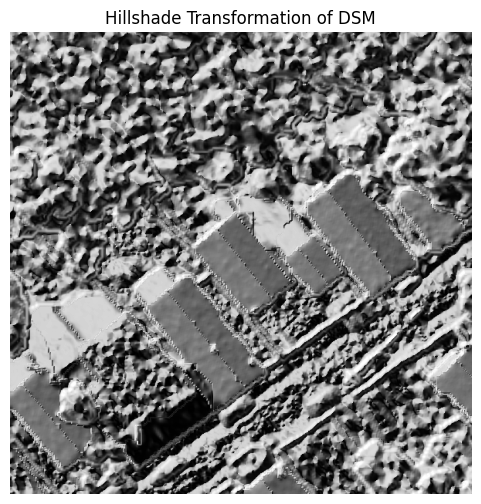

In [5]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

def hillshade(dsm, azimuth=315, elevation=45):
    """Compute a hillshade transformation on a DSM image."""
    # Convert angles to radians
    azimuth_rad = np.radians(azimuth)
    elevation_rad = np.radians(elevation)

    # Compute gradients in X and Y directions
    dx, dy = np.gradient(dsm)

    # Compute slope and aspect
    slope = np.arctan(np.sqrt(dx**2 + dy**2))
    aspect = np.arctan2(-dx, dy)

    # Compute the hillshade effect
    shaded = np.sin(elevation_rad) * np.sin(slope) + np.cos(elevation_rad) * np.cos(slope) * np.cos(azimuth_rad - aspect)

    # Normalize to 0-255 range
    hillshade_image = (shaded - np.min(shaded)) / (np.max(shaded) - np.min(shaded) + 1e-6) * 255
    return hillshade_image.astype(np.uint8)

# **Load DSM**
with rasterio.open(r"Hillshades\test\dsm\17.981108_-66.617364_sunroof_dsm.tif") as src:
    dsm = src.read(1)   # Using previously defined TIFF loading function

dsm=dsm-np.min(dsm)

# **Apply Hillshade Transformation**
hillshade_dsm = hillshade(dsm)

# **Visualize**
plt.figure(figsize=(8, 6))
plt.imshow(hillshade_dsm, cmap='gray')
plt.title("Hillshade Transformation of DSM")
plt.axis('off')
plt.show()


In [27]:
def save_tiff(output_path, array, reference_tiff):
    """Save an array as a GeoTIFF using reference TIFF metadata."""
    with rasterio.open(reference_tiff) as src:
        profile = src.profile
        profile.update(dtype=rasterio.uint8, count=1)

    with rasterio.open(output_path, "w", **profile) as dst:
        dst.write(array, 1)
save_tiff("hillshade_output.tif", hillshade_dsm, dsm_path)
print("Hillshade saved as hillshade_output.tif")

Hillshade saved as hillshade_output.tif


Inspection of pixel value variations in the image

In [28]:
# #Script to see pixel values in RGB and DSM

# import cv2
# import numpy as np
# import rasterio
# import matplotlib
# import matplotlib.pyplot as plt

# # 🔹 Force Interactive Matplotlib Backend (Ensures Window Opens)
# matplotlib.use("TkAgg")

# # 🔹 Global variables for interactive updates
# image = None  # Stores the loaded image
# fig, ax = None, None
# text_annotation = None
# dsm_mode = False  # Flag for handling single-channel DSM images

# def load_image(image_path):
#     """
#     Loads an image from a file (supports PNG, JPG, and GeoTIFF).
    
#     - If DSM (GeoTIFF), reads as a single-band grayscale image.
#     - If RGB (JPG/PNG), loads as a 3-channel color image.
    
#     Returns:
#     - Loaded image as NumPy array.
#     - Flag indicating if it's a DSM (single-channel).
#     """
#     global dsm_mode

#     if image_path.endswith(".tif"):  # DSM case (GeoTIFF)
#         with rasterio.open(image_path) as dataset:
#             img = dataset.read(1).astype(np.float32)  # Read first band (grayscale)
#         dsm_mode = True  # Set flag for DSM mode
#     else:  # RGB case (JPG, PNG)
#         img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load RGB image
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
#         dsm_mode = False

#     return img

# def on_hover(event):
#     """
#     Mouse event callback to display pixel values dynamically inside the image.
#     """
#     global text_annotation

#     if event.xdata is not None and event.ydata is not None:
#         x, y = int(event.xdata), int(event.ydata)  # Convert to integer coordinates

#         if 0 <= x < image.shape[1] and 0 <= y < image.shape[0]:  # Ensure within bounds
#             pixel_value = image[y, x]

#             if dsm_mode:  # DSM: Single-channel
#                 text = f"X: {x}, Y: {y}, Elevation: {pixel_value:.2f}"
#             else:  # RGB: 3-channel
#                 text = f"X: {x}, Y: {y}, RGB: {tuple(pixel_value)}"

#             # Remove previous annotation
#             if text_annotation:
#                 text_annotation.remove()

#             # Add new annotation
#             text_annotation = ax.text(10, 30, text, color="white", fontsize=12, 
#                                       bbox=dict(facecolor="black", alpha=0.5))

#             fig.canvas.draw_idle()  # Update figure dynamically

# def interactive_pixel_viewer(image_path):
#     """
#     Opens an interactive Matplotlib window where pixel values are shown on mouse hover.
#     """
#     global image, fig, ax, text_annotation
#     image = load_image(image_path)  # Load the image

#     # 🔹 Create Figure and Display Image
#     fig, ax = plt.subplots(figsize=(8, 8))
#     ax.imshow(image, cmap="gray" if dsm_mode else None)
#     ax.set_title("Interactive Pixel Viewer")
#     ax.axis("off")

#     # 🔹 Initialize Text Annotation
#     text_annotation = ax.text(10, 30, "", color="white", fontsize=12, 
#                               bbox=dict(facecolor="black", alpha=0.5))

#     # 🔹 Connect Mouse Hover Event
#     fig.canvas.mpl_connect("motion_notify_event", on_hover)

#     # 🔹 Show the Window Without Blocking
#     plt.show(block=False)

#     # 🔹 Keep the Window Open and Responsive
#     while plt.fignum_exists(fig.number):  
#         plt.pause(0.1)
#         fig.canvas.flush_events()  # Ensure real-time updates

# # 🔹 Example Usage
# image_path = "hillshade_output.tif"  # Replace with actual image file (RGB or DSM)
# interactive_pixel_viewer(image_path)

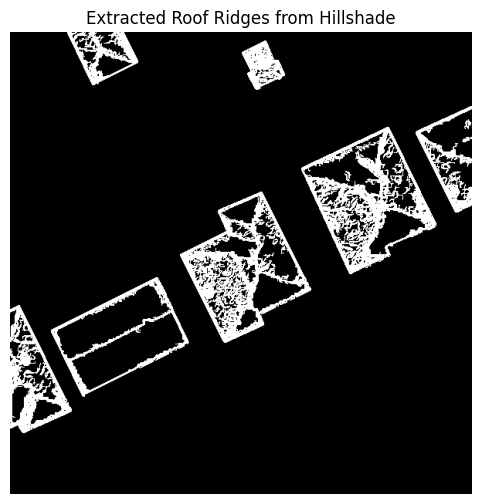

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel
from skimage.segmentation import slic
from skimage.morphology import remove_small_objects

def extract_ridges_from_hillshade(hillshade):
    """Extract ridges from hillshade by detecting strong elevation changes."""
    # Compute elevation differences using Sobel
    elevation_gradient = sobel(hillshade)

    # Adaptive thresholding: Keep only the strongest variations
    threshold = np.percentile(elevation_gradient, 90)  # Adjust percentile if needed
    ridge_mask = elevation_gradient > threshold

    # Use SLIC segmentation to refine ridge boundaries
    num_segments = max(hillshade.shape[0] * hillshade.shape[1] // 500, 150)
    slic_segments = slic(hillshade, n_segments=num_segments, compactness=10, start_label=0,channel_axis=None)

    # Filter out small objects (noise)
    ridge_mask = remove_small_objects(ridge_mask, min_size=30)

    return ridge_mask

# Run extraction on your hillshade image
ridge_map = extract_ridges_from_hillshade(hillshade)

# Display results
plt.figure(figsize=(8, 6))
plt.imshow(ridge_map, cmap="gray")
plt.title("Extracted Roof Ridges from Hillshade")
plt.axis("off")
plt.show()


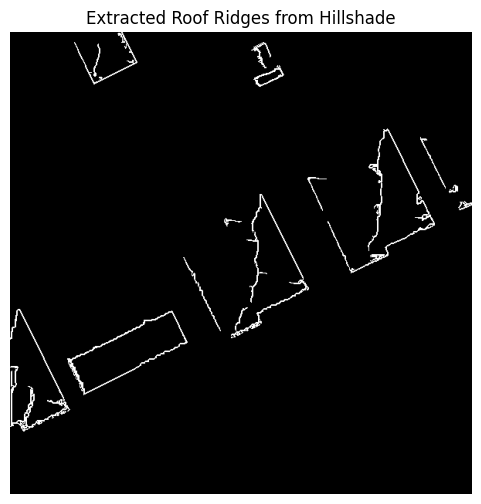

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel, scharr, threshold_otsu
from skimage.segmentation import slic
from skimage.morphology import remove_small_objects

def extract_ridges_from_hillshade(hillshade):
    """Extract roof ridges using sharp elevation changes in hillshade."""
    
    # 1️⃣ Compute elevation gradient using Scharr (better for sharp edges)
    grad_x = scharr(hillshade, axis=1)
    grad_y = scharr(hillshade, axis=0)
    elevation_gradient = np.hypot(grad_x, grad_y)  # Combine gradients
    
    # 2️⃣ Use Otsu’s method to automatically find the best threshold
    threshold = threshold_otsu(elevation_gradient)
    ridge_mask = elevation_gradient > threshold  # Keep only strong edges

    # 3️⃣ Apply SLIC segmentation to smooth ridges
    num_segments = max(hillshade.shape[0] * hillshade.shape[1] // 400, 200)
    slic_segments = slic(hillshade, n_segments=num_segments, compactness=15, start_label=0,channel_axis=None)
    
    # 4️⃣ Remove small noisy segments
    ridge_mask = remove_small_objects(ridge_mask, min_size=50)

    return ridge_mask

# Run ridge extraction on your hillshade image
ridge_map = extract_ridges_from_hillshade(hillshade)
plt.imsave("ridge_map.png", ridge_map, cmap="gray")



# Display results
plt.figure(figsize=(8, 6))
plt.imshow(ridge_map, cmap="gray")
plt.title("Extracted Roof Ridges from Hillshade")
plt.axis("off")
plt.show()


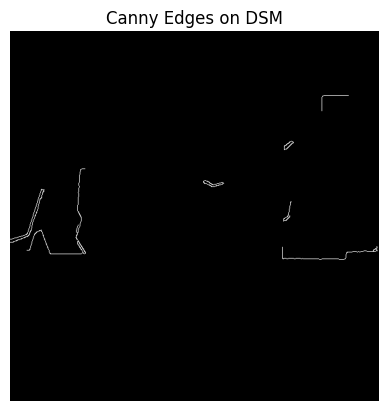

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import rasterio

# Assuming dsm is 2D (float32) and already loaded
def load_dsm(dsm_path):
    with rasterio.open(dsm_path) as dataset:
        dsm = dataset.read(1).astype(np.float32)
        dsm = np.nan_to_num(dsm, nan=np.nanmean(dsm))
    return dsm
dsm=load_dsm("masked_dsm.tif")
dsm_norm = cv2.normalize(dsm, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

blurred = cv2.GaussianBlur(dsm_norm, (5, 5), 1)
edges = cv2.Canny(blurred, 50, 150)




plt.imshow(edges, cmap='gray')
plt.title("Canny Edges on DSM")
plt.axis('off')
plt.show()


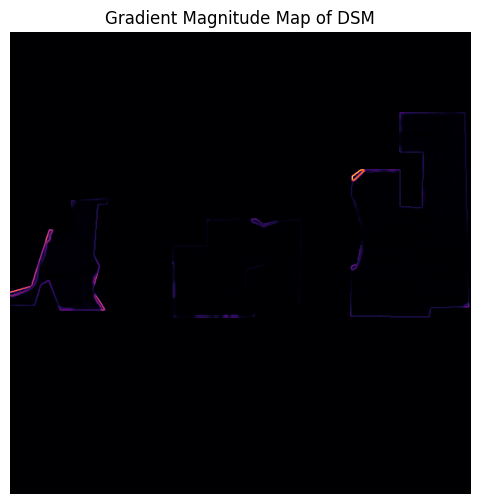

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Assume dsm has shape (1, H, W) and is float32
dsm = np.squeeze(dsm)  # Shape: (600, 596)

# Normalize DSM for visualization
dsm_norm = cv2.normalize(dsm, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Compute Sobel gradients
grad_x = cv2.Sobel(dsm_norm, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(dsm_norm, cv2.CV_64F, 0, 1, ksize=3)

# Compute gradient magnitude
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Visualize
plt.figure(figsize=(8, 6))
plt.imshow(gradient_magnitude, cmap='inferno')
plt.title('Gradient Magnitude Map of DSM')
plt.axis('off')
plt.show()


Hillside Transformations Generation

In [1]:
# import os
# import numpy as np
# import rasterio
# from rasterio.plot import reshape_as_raster
# from matplotlib.colors import LightSource
# import matplotlib.pyplot as plt

# def generate_hillshade(dsm_path, save_path, azimuth=180, angle_altitude=45):
#     with rasterio.open(dsm_path) as src:
#         elevation = src.read(1)  # First band
#         profile = src.profile

#         # Masking no data values (optional, based on DSM)
#         if profile['nodata'] is not None:
#             elevation = np.where(elevation == profile['nodata'], np.nan, elevation)

#     # Generate hillshade using matplotlib's LightSource
#     ls = LightSource(azdeg=azimuth, altdeg=angle_altitude)
#     hillshade = ls.hillshade(elevation, vert_exag=1, dx=1, dy=1)

#     # Save hillshade as a new image (normalize and save as 8-bit)
#     hillshade_uint8 = (hillshade * 255).astype(np.uint8)

#     out_path = os.path.join(save_path, os.path.basename(dsm_path).replace('.tif', '_hillshade.tif'))
#     profile.update(dtype=rasterio.uint8, count=1, nodata=None)

#     with rasterio.open(out_path, 'w', **profile) as dst:
#         dst.write(hillshade_uint8, 1)

#     print(f"Hillshade saved to: {out_path}")

# def process_directory(dsm_dir, output_dir):
#     os.makedirs(output_dir, exist_ok=True)
#     for filename in os.listdir(dsm_dir):
#         if filename.lower().endswith('.tif'):
#             dsm_path = os.path.join(dsm_dir, filename)
#             generate_hillshade(dsm_path, output_dir)

# # 👉 Update paths here
# input_dsm_directory = r'E:\Annotation\unlabeled_images\unlabeled_images\dsm'
# output_hillshade_directory = r'E:\Proto\Ridgewise\Post_processing\Hillshades\azimuth_180_degrees'

# process_directory(input_dsm_directory, output_hillshade_directory)


In [1]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt

def hillshade(dsm, azimuth=315, elevation=45):
    azimuth_rad = np.radians(azimuth)
    elevation_rad = np.radians(elevation)

    dx, dy = np.gradient(dsm)
    slope = np.arctan(np.sqrt(dx**2 + dy**2))
    aspect = np.arctan2(-dx, dy)

    shaded = np.sin(elevation_rad) * np.sin(slope) + np.cos(elevation_rad) * np.cos(slope) * np.cos(azimuth_rad - aspect)
    hillshade_image = (shaded - np.min(shaded)) / (np.max(shaded) - np.min(shaded) + 1e-6) * 255
    return hillshade_image.astype(np.uint8)

# --- Path Setup ---
input_dir = r"Hillshades\test\dsm"
output_dir = r"Hillshades\test\hillshades"
os.makedirs(output_dir, exist_ok=True)

# --- Process Each DSM ---
for file in os.listdir(input_dir):
    if not file.endswith(".tif"):
        continue

    dsm_path = os.path.join(input_dir, file)
    out_path = os.path.join(output_dir, file.replace(".tif", "_hillshade.tif"))

    # Load DSM
    with rasterio.open(dsm_path) as src:
        dsm = src.read(1)
        profile = src.profile

    # Apply Hillshade
    hillshade_img = hillshade(dsm)

    # Update profile for single grayscale 8-bit output
    profile.update(dtype=rasterio.uint8, count=1)

    # Save Hillshade
    with rasterio.open(out_path, 'w', **profile) as dst:
        dst.write(hillshade_img, 1)

    print(f"✅ Saved hillshade: {out_path}")

print("🎉 All DSMs converted to hillshades.")


✅ Saved hillshade: Hillshades\test\hillshades\17.981108_-66.617364_sunroof_dsm_hillshade.tif
✅ Saved hillshade: Hillshades\test\hillshades\18.005201_-66.618017_sunroof_dsm_hillshade.tif
✅ Saved hillshade: Hillshades\test\hillshades\18.010328_-66.603572_sunroof_dsm_hillshade.tif
✅ Saved hillshade: Hillshades\test\hillshades\18.010884_-66.621653_sunroof_dsm_hillshade.tif
✅ Saved hillshade: Hillshades\test\hillshades\18.014566_-66.598029_sunroof_dsm_hillshade.tif
✅ Saved hillshade: Hillshades\test\hillshades\18.015807_-66.643105_sunroof_dsm_hillshade.tif
✅ Saved hillshade: Hillshades\test\hillshades\18.016628_-66.581055_sunroof_dsm_hillshade.tif
✅ Saved hillshade: Hillshades\test\hillshades\18.034664_-66.619352_sunroof_dsm_hillshade.tif
✅ Saved hillshade: Hillshades\test\hillshades\18.043926_-66.573005_sunroof_dsm_hillshade.tif
✅ Saved hillshade: Hillshades\test\hillshades\18.046806_-66.5285_sunroof_dsm_hillshade.tif
✅ Saved hillshade: Hillshades\test\hillshades\18.05304_-66.721303_sunroo

In [4]:
import os
import numpy as np
import rasterio
from tqdm import tqdm

def hillshade(dsm, azimuth=270, elevation=45):
    azimuth_rad = np.radians(azimuth)
    elevation_rad = np.radians(elevation)

    dx, dy = np.gradient(dsm)
    slope = np.arctan(np.sqrt(dx**2 + dy**2))
    aspect = np.arctan2(-dx, dy)

    shaded = (
        np.sin(elevation_rad) * np.sin(slope)
        + np.cos(elevation_rad) * np.cos(slope) * np.cos(azimuth_rad - aspect)
    )
    hillshade_image = (shaded - shaded.min()) / (shaded.max() - shaded.min() + 1e-6) * 255
    return hillshade_image.astype(np.uint8)

# --- Paths and Parameters ---
input_dir = r"E:\Annotation\unlabeled_images\unlabeled_images\dsm"
output_dir = r"Hillshades\azimuth_270_degrees"
azimuth = 270
elevation = 45
os.makedirs(output_dir, exist_ok=True)

# --- Get DSM Files ---
dsm_files = [f for f in os.listdir(input_dir) if f.endswith(".tif")]

# --- Process with Progress Bar ---
for file in tqdm(dsm_files, desc=f"Generating hillshades (azimuth={azimuth})"):
    dsm_path = os.path.join(input_dir, file)
    
    base_name, ext = os.path.splitext(file)
    out_filename = f"{base_name}_az{azimuth}{ext}"
    out_path = os.path.join(output_dir, out_filename)

    # Load DSM
    with rasterio.open(dsm_path) as src:
        dsm = src.read(1)
        profile = src.profile

    # Apply Hillshade
    hillshade_img = hillshade(dsm, azimuth=azimuth, elevation=elevation)

    # Save Hillshade
    profile.pop('nodata', None)  # or use profile.update(nodata=None)
    profile.update(dtype=rasterio.uint8, count=1)

    with rasterio.open(out_path, 'w', **profile) as dst:
        dst.write(hillshade_img, 1)


Generating hillshades (azimuth=270):   0%|          | 0/4998 [00:00<?, ?it/s]

Generating hillshades (azimuth=270): 100%|██████████| 4998/4998 [05:19<00:00, 15.67it/s]


Requesting Outer Boundaries

In [12]:
import os
import subprocess

# Input & output directories
input_dir = r"Hillshades\test\rgbs"      # 🔁 Replace this
output_dir = r"Hillshades\test\masks"   # 🔁 Replace this
os.makedirs(output_dir, exist_ok=True)

# API cURL command parameters
url = "https://solarquote.api.abacus.ai/api/predict"
deployment_token = "4f8ad7e922ec4c0aaf0661c0c32292b8"
deployment_id = "ec5487e60"

# Iterate through .tif files in the directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith('.tif'):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_response.json")

        # Build cURL command
        curl_command = [
            "curl", "--silent", "--location", 
            f"{url}?deploymentToken={deployment_token}&deploymentId={deployment_id}",
            "--form", f"blob=@\"{input_path}\""
        ]

        print(f"⏳ Sending: {filename}")
        try:
            # Run the command and capture output
            result = subprocess.run(curl_command, capture_output=True, text=True)
            # Save response
            with open(output_path, 'w') as f:
                f.write(result.stdout)
            print(f"✅ Saved response for: {filename}")
        except Exception as e:
            print(f"❌ Failed for {filename}: {e}")

print("🚀 Done with all files.")


⏳ Sending: 17.981108_-66.617364_sunroof_rgb.tif
✅ Saved response for: 17.981108_-66.617364_sunroof_rgb.tif
⏳ Sending: 18.005201_-66.618017_sunroof_rgb.tif
✅ Saved response for: 18.005201_-66.618017_sunroof_rgb.tif
⏳ Sending: 18.010328_-66.603572_sunroof_rgb.tif
✅ Saved response for: 18.010328_-66.603572_sunroof_rgb.tif
⏳ Sending: 18.010884_-66.621653_sunroof_rgb.tif
✅ Saved response for: 18.010884_-66.621653_sunroof_rgb.tif
⏳ Sending: 18.014566_-66.598029_sunroof_rgb.tif
✅ Saved response for: 18.014566_-66.598029_sunroof_rgb.tif
⏳ Sending: 18.015807_-66.643105_sunroof_rgb.tif
✅ Saved response for: 18.015807_-66.643105_sunroof_rgb.tif
⏳ Sending: 18.016628_-66.581055_sunroof_rgb.tif
✅ Saved response for: 18.016628_-66.581055_sunroof_rgb.tif
⏳ Sending: 18.034664_-66.619352_sunroof_rgb.tif
✅ Saved response for: 18.034664_-66.619352_sunroof_rgb.tif
⏳ Sending: 18.043926_-66.573005_sunroof_rgb.tif
✅ Saved response for: 18.043926_-66.573005_sunroof_rgb.tif
⏳ Sending: 18.046806_-66.5285_sunroof

In [15]:
import os
import json
import numpy as np
import rasterio
import cv2

# Paths - update these to your local folders
dsm_dir = r"Hillshades\test\dsm"
json_dir = r"Hillshades\test\masks"
output_dir = r"Hillshades\test\masked_dsms"
os.makedirs(output_dir, exist_ok=True)

# Loop through DSM files
for dsm_file in os.listdir(dsm_dir):
    if not dsm_file.endswith("_sunroof_dsm.tif"):
        continue

    base_prefix = dsm_file.replace("_sunroof_dsm.tif", "")
    json_name = f"{base_prefix}_sunroof_rgb_response.json"

    dsm_path = os.path.join(dsm_dir, dsm_file)
    json_path = os.path.join(json_dir, json_name)
    output_path = os.path.join(output_dir, dsm_file)

    if not os.path.exists(json_path):
        print(f"⚠️ JSON mask not found for {dsm_file}")
        continue

    # --- Load DSM ---
    with rasterio.open(dsm_path) as src:
        dsm = src.read(1)
        meta = src.meta

    # --- Load JSON mask ---
    with open(json_path, 'r') as f:
        data = json.load(f)
    mask_array = np.array(data["result"]["image_array"]).astype(np.uint8)

    # --- Resize mask if needed ---
    if mask_array.shape != dsm.shape:
        mask_array = cv2.resize(mask_array, (dsm.shape[1], dsm.shape[0]), interpolation=cv2.INTER_NEAREST)

    # --- Apply mask: keep only non-zero (house) areas ---
    binary_mask = (mask_array > 0).astype(np.uint8)
    filtered_dsm = dsm * binary_mask

    # --- Save filtered DSM ---
    meta.update(dtype='float32', count=1)
    with rasterio.open(output_path, 'w', **meta) as dst:
        dst.write(filtered_dsm.astype(np.float32), 1)

    print(f"✅ Filtered DSM saved: {output_path}")

print("🎉 All DSMs processed and cleaned using mask.")


✅ Filtered DSM saved: Hillshades\test\masked_dsms\17.981108_-66.617364_sunroof_dsm.tif
✅ Filtered DSM saved: Hillshades\test\masked_dsms\18.005201_-66.618017_sunroof_dsm.tif
✅ Filtered DSM saved: Hillshades\test\masked_dsms\18.010328_-66.603572_sunroof_dsm.tif
✅ Filtered DSM saved: Hillshades\test\masked_dsms\18.010884_-66.621653_sunroof_dsm.tif
✅ Filtered DSM saved: Hillshades\test\masked_dsms\18.014566_-66.598029_sunroof_dsm.tif
✅ Filtered DSM saved: Hillshades\test\masked_dsms\18.015807_-66.643105_sunroof_dsm.tif
✅ Filtered DSM saved: Hillshades\test\masked_dsms\18.016628_-66.581055_sunroof_dsm.tif
✅ Filtered DSM saved: Hillshades\test\masked_dsms\18.034664_-66.619352_sunroof_dsm.tif
✅ Filtered DSM saved: Hillshades\test\masked_dsms\18.043926_-66.573005_sunroof_dsm.tif
✅ Filtered DSM saved: Hillshades\test\masked_dsms\18.046806_-66.5285_sunroof_dsm.tif
✅ Filtered DSM saved: Hillshades\test\masked_dsms\18.05304_-66.721303_sunroof_dsm.tif
✅ Filtered DSM saved: Hillshades\test\masked_d

Exploring Building ALgorithms path
1. Generate a map with Canny + Gradient Estimation on masked + non-masked only nearmap

For masked

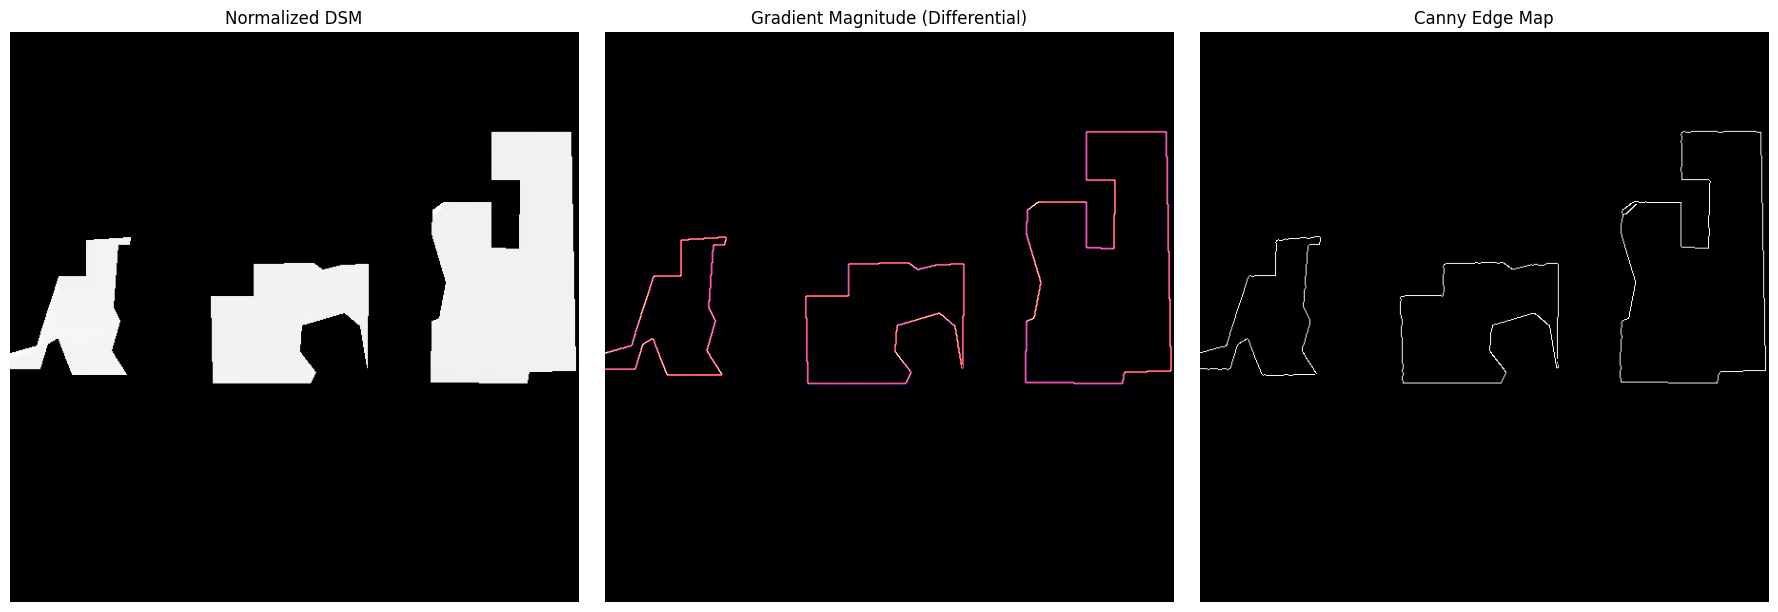

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tifffile as tiff

# Load DSM
dsm = tiff.imread('masked_dsm.tif')

# Preprocessing: Replace NaNs and normalize
dsm = np.nan_to_num(dsm, nan=0.0)
dsm_norm = cv2.normalize(dsm, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
dsm_norm = dsm_norm.astype(np.uint8)

# Gradient using central differences
dy_masked, dx_masked = np.gradient(dsm.astype(np.float32))
gradient_magnitude_masked = np.sqrt(dx_masked**2 + dy_masked**2)

# Canny Edge Detection (on normalized DSM)
edges_masked = cv2.Canny(dsm_norm, 50, 150)

# Visualize all maps
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(dsm_norm, cmap='gray')
axs[0].set_title('Normalized DSM')

axs[1].imshow(gradient_magnitude_masked, cmap='magma')
axs[1].set_title('Gradient Magnitude (Differential)')

axs[2].imshow(edges_masked, cmap='gray')
axs[2].set_title('Canny Edge Map')

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()

np.save('canny_edges_nearmap_33.884_masked.npy', edges)
np.save('gradient_magnitude_nearmap_33.884_masked.npy', gradient_magnitude)


Non-Masked

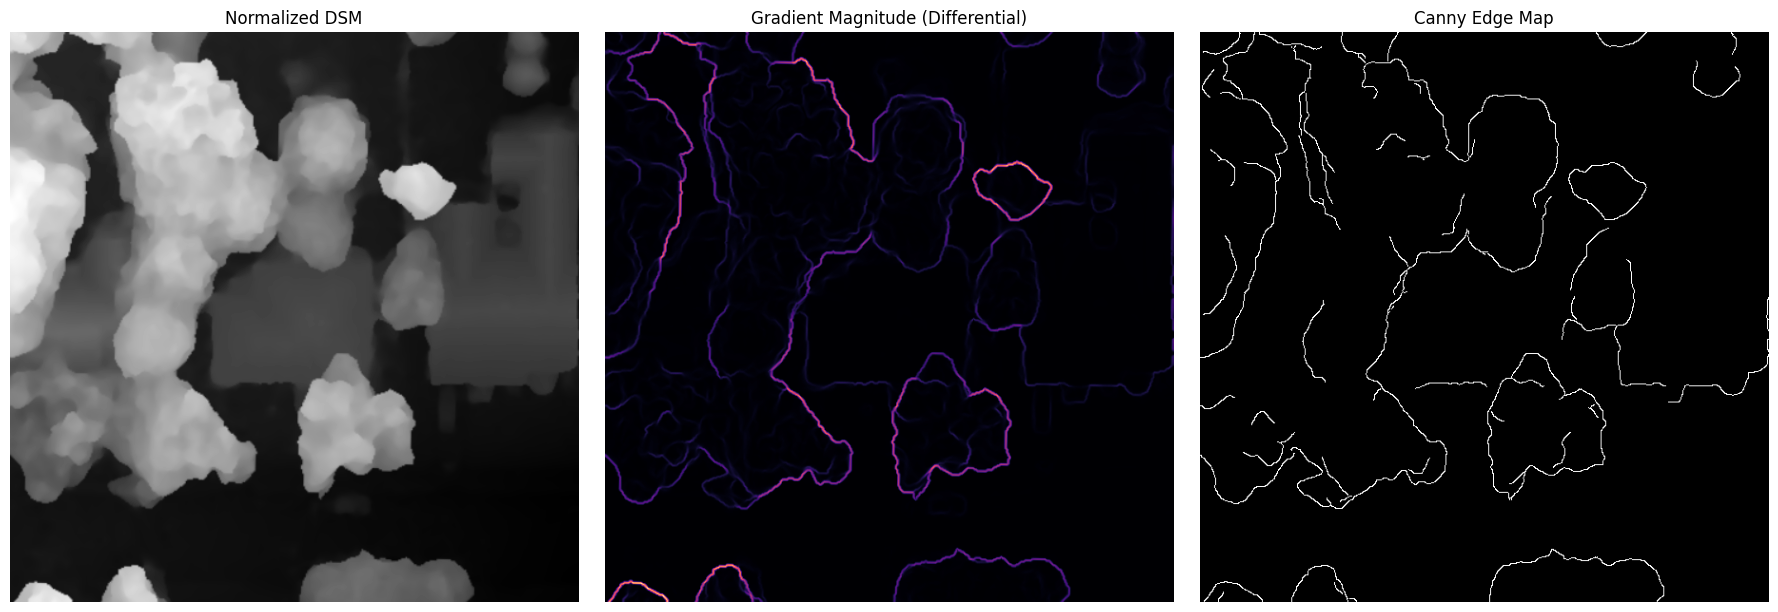

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tifffile as tiff

# Load DSM
dsm = tiff.imread('32.884040299999995_-96.64130139999999_nearmap_dsm.tif')

# Preprocessing: Replace NaNs and normalize
dsm = np.nan_to_num(dsm, nan=0.0)
dsm_norm = cv2.normalize(dsm, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
dsm_norm = dsm_norm.astype(np.uint8)

# Gradient using central differences
dy, dx = np.gradient(dsm.astype(np.float32))
gradient_magnitude = np.sqrt(dx**2 + dy**2)

# Canny Edge Detection (on normalized DSM)
edges = cv2.Canny(dsm_norm, 50, 150)

# Visualize all maps
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(dsm_norm, cmap='gray')
axs[0].set_title('Normalized DSM')

axs[1].imshow(gradient_magnitude, cmap='magma')
axs[1].set_title('Gradient Magnitude (Differential)')

axs[2].imshow(edges, cmap='gray')
axs[2].set_title('Canny Edge Map')

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()

np.save('canny_edges_nearmap_33.884.npy', edges)
np.save('gradient_magnitude_nearmap_33.884.npy', gradient_magnitude)


Try inpaininting on dsm masked only nearmap

c:\Users\adity\miniconda3\envs\pytorch-gpu-env\lib\site-packages\skimage\metrics\simple_metrics.py:163: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range ** 2) / err)


PSNR (excluding vegetation + NaNs): inf dB


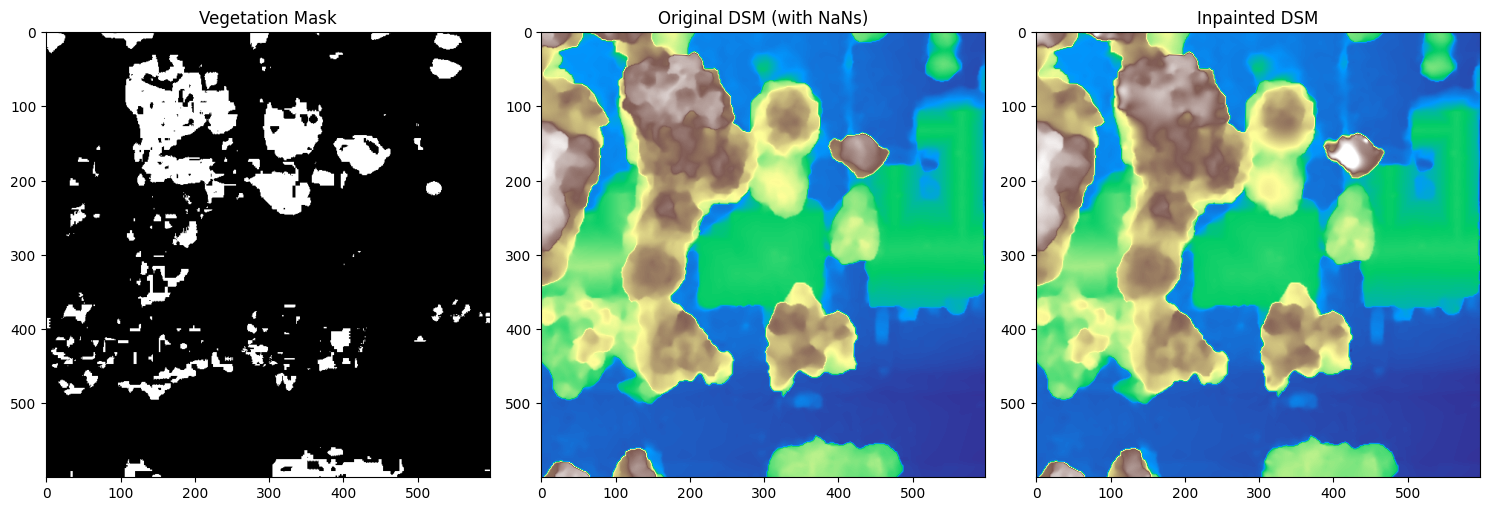

In [12]:
import numpy as np
import tifffile as tiff
from skimage.restoration import inpaint
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt

def load_tiff(path):
    return tiff.imread(path)

def get_vegetation_mask_from_rgb(rgb_img, threshold=20):
    rgb = rgb_img.astype(np.float32)
    R, G, B = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    exg = 2 * G - R - B
    veg_mask = exg > threshold
    return veg_mask.astype(np.uint8)

def apply_inpainting(dsm, mask):
    # Also treat NaNs as masked
    full_mask = np.logical_or(mask == 1, np.isnan(dsm))
    dsm_filled = np.nan_to_num(dsm, nan=0.0)
    inpainted = inpaint.inpaint_biharmonic(dsm_filled, full_mask, channel_axis=None)
    return inpainted, full_mask

def compute_psnr(original, inpainted, mask):
    valid_mask = mask == 0
    masked_original = original[valid_mask]
    masked_inpainted = inpainted[valid_mask]
    
    data_range = masked_original.max() - masked_original.min()
    return psnr(masked_original, masked_inpainted, data_range=data_range)


# === INPUT PATHS ===
dsm_path = "32.884040299999995_-96.64130139999999_nearmap_dsm.tif"
rgb_path = "32.884040299999995_-96.64130139999999_nearmap_rgb.tif"

# === LOAD DATA ===
dsm = load_tiff(dsm_path).astype(np.float32)
rgb = load_tiff(rgb_path)

# === GENERATE VEGETATION MASK ===
veg_mask = get_vegetation_mask_from_rgb(rgb, threshold=20)

# === INPAINT DSM ===
inpainted_dsm, combined_mask = apply_inpainting(dsm, veg_mask)

# === EVALUATE PSNR ===
psnr_score = compute_psnr(dsm, inpainted_dsm, combined_mask)
print(f"PSNR (excluding vegetation + NaNs): {psnr_score:.2f} dB")

# === SAVE RESULTS ===
np.save("veg_mask.npy", veg_mask)
np.save("combined_mask.npy", combined_mask)
np.save("inpainted_dsm.npy", inpainted_dsm)

# === VISUALIZE ===
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Vegetation Mask")
plt.imshow(veg_mask, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Original DSM (with NaNs)")
plt.imshow(np.nan_to_num(dsm), cmap='terrain')

plt.subplot(1, 3, 3)
plt.title("Inpainted DSM")
plt.imshow(inpainted_dsm, cmap='terrain')
plt.tight_layout()
plt.show()


In [15]:
print("RGB shape:", rgb.shape)  # e.g. (height, width, channels)
print("DSM shape:", dsm.shape)  # e.g. (height, width)


RGB shape: (600, 598, 3)
DSM shape: (600, 598)


In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

# Load your RGB and DSM images
rgb_image_path = '32.884040299999995_-96.64130139999999_nearmap_rgb.tif'  # Replace with your RGB image path
dsm_image_path = '32.884040299999995_-96.64130139999999_nearmap_dsm.tif'  # Replace with your DSM image path

# Read RGB image (3 channels, assuming it's a TIFF with RGB)
rgb_image = cv2.imread(rgb_image_path, cv2.IMREAD_COLOR)
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Read DSM image (1 channel, assuming it's a grayscale image)
dsm_image = cv2.imread(dsm_image_path, cv2.IMREAD_GRAYSCALE)

# Resize both images to the same shape if necessary (600x598)
rgb_resized = cv2.resize(rgb_image, (598, 600))  # Ensure matching size for consistency
dsm_resized = cv2.resize(dsm_image, (598, 600))

# Convert DSM to 3 channels by repeating along the last axis
dsm_3channel = np.repeat(dsm_resized[:, :, np.newaxis], 3, axis=2)

# Optionally normalize DSM to match RGB scale [0, 1] (if needed)
dsm_normalized = (dsm_3channel - np.min(dsm_3channel)) / (np.max(dsm_3channel) - np.min(dsm_3channel))

# Visualize the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(rgb_resized)
plt.title("RGB Image")

plt.subplot(1, 2, 2)
plt.imshow(dsm_normalized)
plt.title("Normalized DSM Image")

plt.show()

# Calculate PSNR between the RGB image and the DSM image
# First, ensure both images have the same shape and are in the same data range
rgb_resized = rgb_resized.astype(np.float32)
dsm_normalized = dsm_normalized.astype(np.float32)

# PSNR calculation requires the image data in the same scale, so we do a quick conversion to [0, 255] range
rgb_resized = rgb_resized / 255.0  # Normalize RGB to [0, 1]
dsm_normalized = dsm_normalized / 255.0  # Normalize DSM to [0, 1]

# Compute PSNR
psnr_value = psnr(rgb_resized, dsm_normalized)

print(f"PSNR between the RGB image and the normalized DSM: {psnr_value} dB")


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
